# AI and Machine Learning Project

**`Name              - ID`**<br>
>`Tasneem Qat         - 0201502`<br>
>`Leen Abderrahman    - 0207898`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**1. Importing the data and observing its structure**<br>
*Importing the pandas library, using it to load and read the provided csv file, and exploring the first 5 entries of the dataset*

In [2]:
loans = pd.read_csv("loan_approval_dataset.csv")
loans.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


*Exploring the statistical information of the dataset*

In [3]:
loans.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


*Showing the datatypes for each feature of the dataset*

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


*Creating a copy of the target feature column*

In [5]:
new_column_names = {i: i.strip() for i in loans.columns}
loans.rename(columns=new_column_names, inplace=True)
loans['self_employed'] = loans['self_employed'].str.strip()
loans['education'] = loans['education'].str.strip()
loans['loan_status'] = loans['loan_status'].str.strip()

In [6]:
loans_labels = loans['loan_status'].copy()

**2. Adding new features**

*Total Assets: sum of residental, commercial, luxury, and bank assets.*

In [7]:
loans['total_assets_value'] = (loans['residential_assets_value'] + loans['commercial_assets_value'] + loans['luxury_assets_value'] + loans['bank_asset_value'])

*Annual Payment: the loan amount divided by the number of years.*

In [8]:
loans['annual_payment'] = loans['loan_amount']/loans['loan_term']

*Income to Loan Ratio: the annual income divided by the amount of loan.*

In [9]:
loans['income_to_loan_ratio'] = loans['income_annum'] / loans['loan_amount']

**3. Visualising Data**

*The target feature's values count*

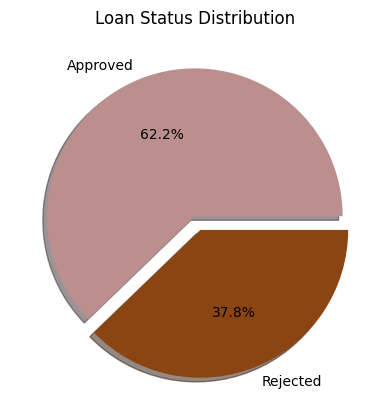

In [10]:
loan_status_count = loans['loan_status'].value_counts()
pie_chart_labels = loan_status_count.index.to_numpy()
pie_chart_values = loan_status_count.to_numpy()
plt.pie(pie_chart_values, labels=pie_chart_labels, autopct="%1.1f%%",  colors=['rosybrown','saddlebrown'], shadow=True, explode=(0,0.1)) 
plt.title("Loan Status Distribution")
plt.show()



*Plotting the numerical features of the loans in the dataset*

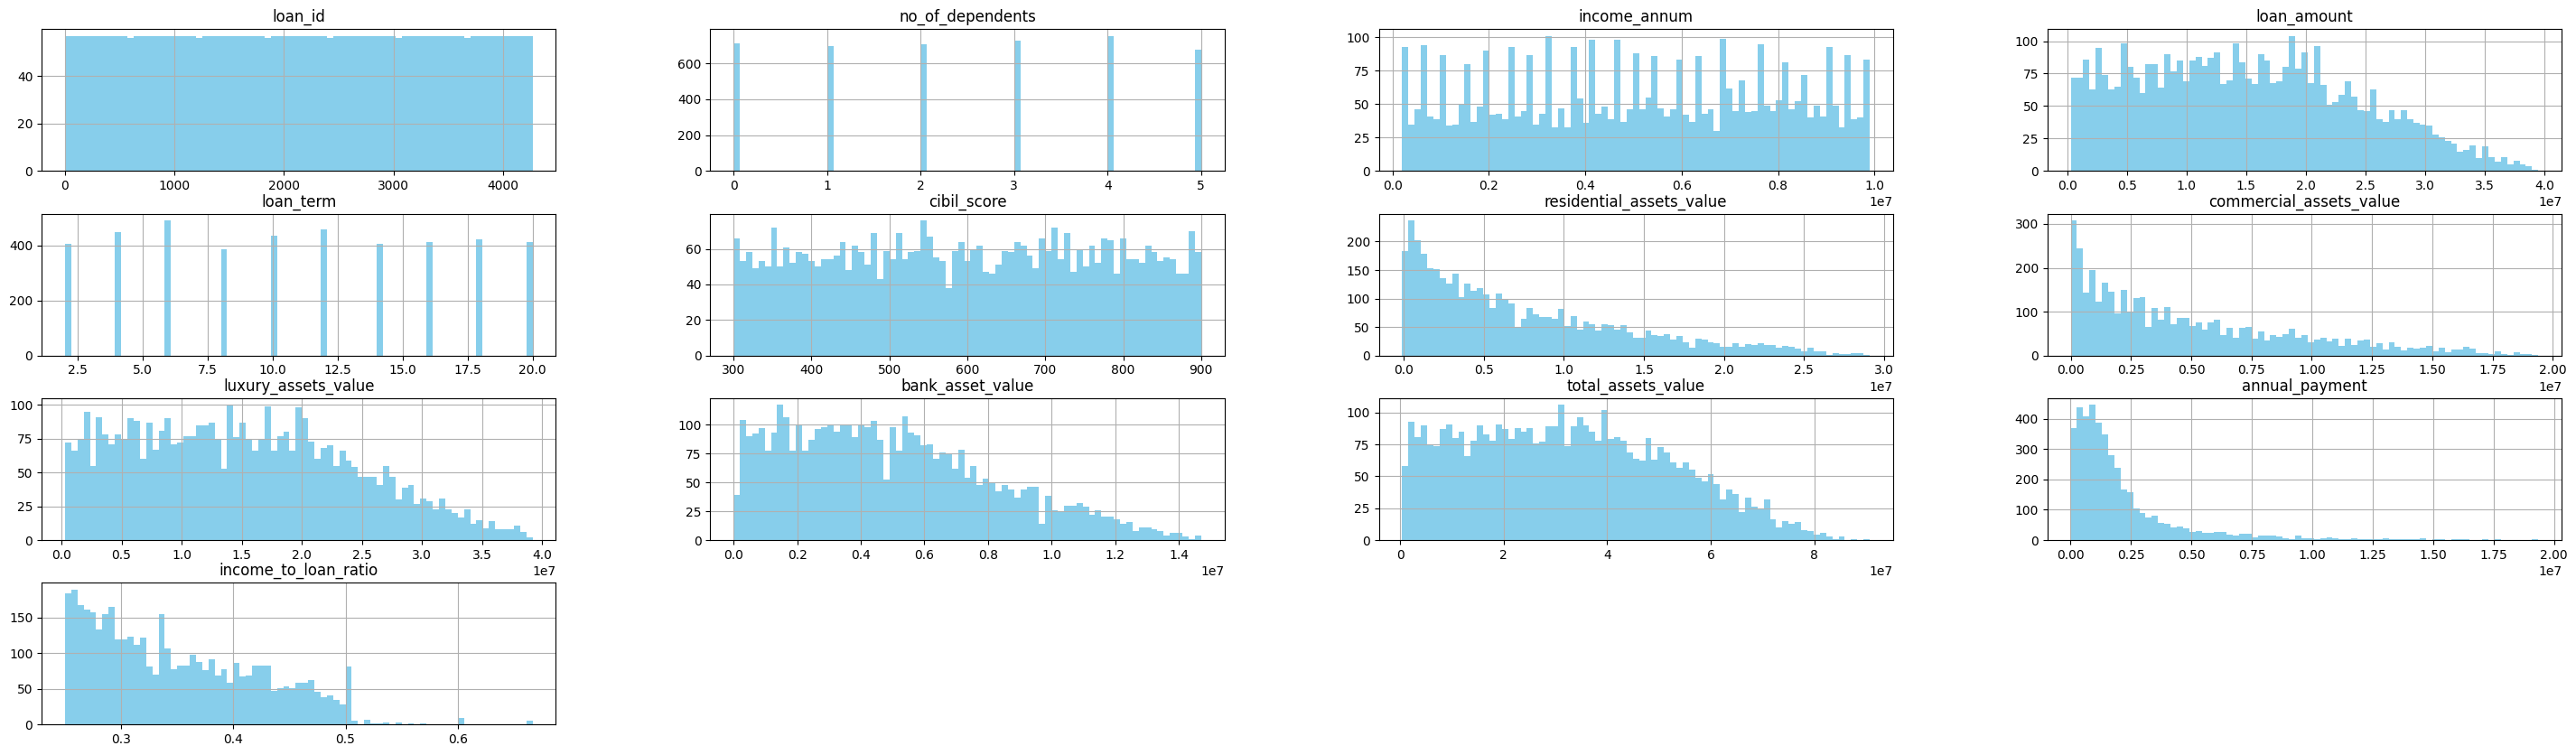

In [11]:
loans.hist(bins=75,figsize=(36,10), color='skyblue')
plt.rc('xtick', labelsize=15)
plt.show()

*Plotting the effect of the annual income and the loan amount on the state of the loan*

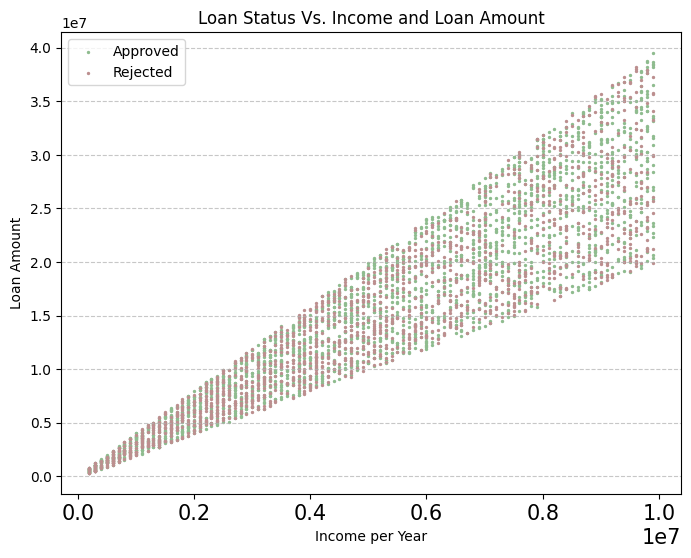

In [12]:
import matplotlib.pyplot as plt

loan_status_colors = {'Approved': 'darkseagreen', 'Rejected': 'rosybrown'}

approved_loans = loans[loans['loan_status'] == 'Approved']
rejected_loans = loans[loans['loan_status'] == 'Rejected']

approved_income = approved_loans['income_annum']
approved_loan_amount = approved_loans['loan_amount']

rejected_income = rejected_loans['income_annum']
rejected_loan_amount = rejected_loans['loan_amount']

plt.figure(figsize=(8, 6))

plt.scatter(approved_income, approved_loan_amount, color=loan_status_colors['Approved'], label='Approved',s=2)

plt.scatter(rejected_income, rejected_loan_amount, color=loan_status_colors['Rejected'], label='Rejected',s=2)

plt.xlabel('Income per Year')
plt.ylabel('Loan Amount')
plt.title('Loan Status Vs. Income and Loan Amount')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


*Visualizing the effect of education level on the loan status*

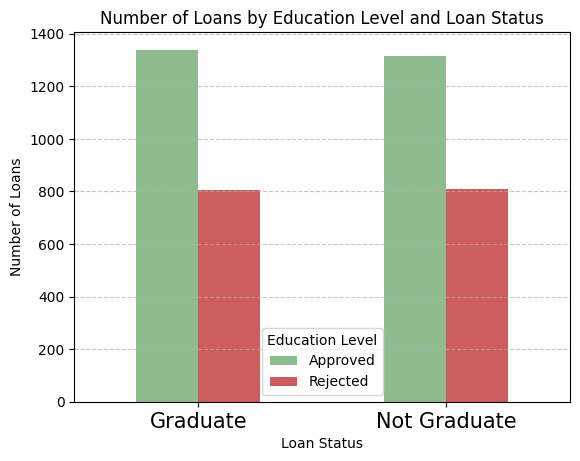

In [13]:
ed_data = {'education': loans['education'],
        'loan_status': loans['loan_status']}

df = pd.DataFrame(ed_data)

loan_counts = df.groupby(['education', 'loan_status']).size().unstack(fill_value=0)

loan_counts.plot(kind='bar', color=['darkseagreen', 'indianred'])
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.title('Number of Loans by Education Level and Loan Status')
plt.xticks(rotation=0)
plt.legend(title='Education Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*A boxplot that showcases the cibil score statistics for each value of the loan status (Approved, Rejected)*

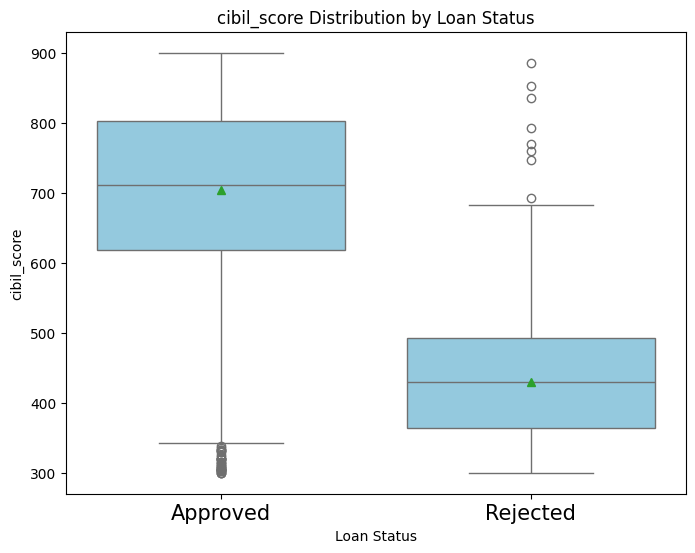

In [14]:
import seaborn as sb

plt.figure(figsize=(8, 6))
sb.boxplot(
    x = "loan_status",
    y = "cibil_score",
    showmeans=True,
    data=loans,
    color='skyblue'
)
plt.xlabel('Loan Status')
plt.ylabel('cibil_score')
plt.title('cibil_score Distribution by Loan Status')
plt.show()

**4. Observing Correlations**

In [15]:
loans_correlation = loans.copy()
loans_correlation['education'] = loans_correlation['education'].map({'Graduate': 1, 'Not Graduate': 0})
loans_correlation["self_employed"]= loans_correlation["self_employed"].map({'Yes': 1, 'No': 0})
loans_correlation["loan_status"]= loans_correlation["loan_status"].map({'Approved': 1, 'Rejected': 0})   
loans_correlation.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value,annual_payment,income_to_loan_ratio
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,50700000,2.491667e+06,0.321070
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,17000000,1.525000e+06,0.336066
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,57700000,1.485000e+06,0.306397
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,52700000,3.837500e+06,0.267101
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,55000000,1.210000e+06,0.404959


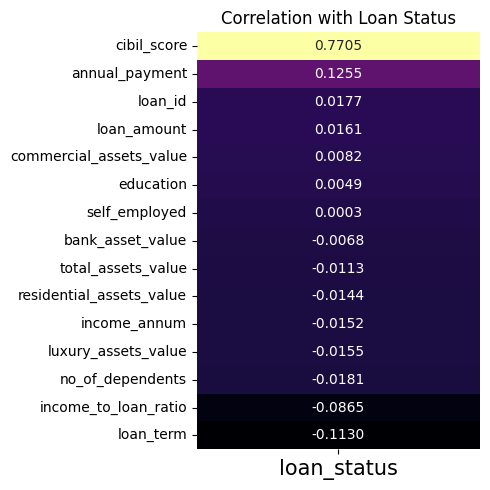

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = loans_correlation.corr()
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

target_corr = correlation['loan_status'].drop('loan_status')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.heatmap(target_corr_sorted.to_frame(), cmap="inferno", annot=True, fmt='.4f', cbar=False, ax=ax)
ax.set_title('Correlation with Loan Status')

plt.tight_layout()
plt.show()

*Some features' correlations with the target features are almost zero; self_employed and education. These can be dropped.*

**5. Observing Outliers**

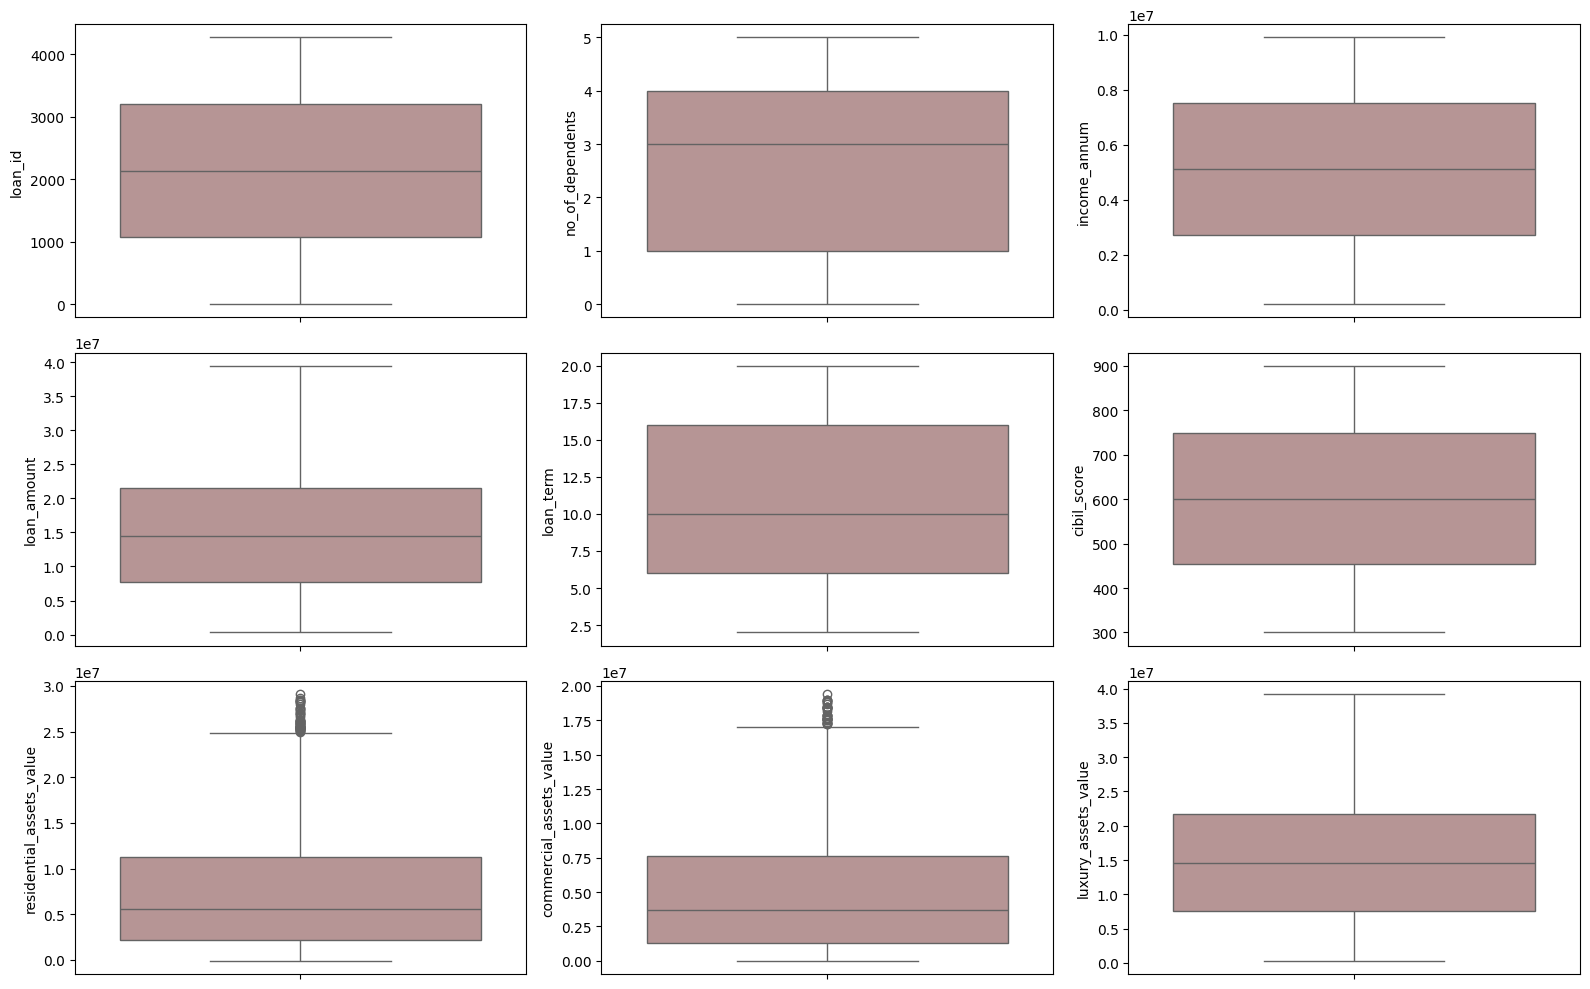

In [17]:
loans_num_cols = loans.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(16, 10))
for i, column in enumerate(loans_num_cols[:9], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=loans[column],color="rosybrown")

plt.tight_layout()

**6. Preparing for and creating the transformation pipelines**

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

*Determining how features will be encoded according to their type*

In [19]:
onehot_features = ['education', 'self_employed']
loans_cat = loans[onehot_features]
loans_num = loans.select_dtypes(include=[np.number])

In [20]:
num_attribs = list(loans_num)
cat_attribs_onehot = list(loans_cat)

*Implementing a pipeline for imputing, scaling, and encoding*

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

cat_pipeline_onehot = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder()),
    ])



In [22]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat_onehot", cat_pipeline_onehot, cat_attribs_onehot)
])


*Encoding the target feature column values*

In [23]:
labels_prepared = loans_labels.map({'Approved': 1, 'Rejected': 0})
loans = loans.drop('loan_status', axis=1)
loans_prepared = preprocessing.fit_transform(loans)


In [24]:
loans_prepared_df =pd.DataFrame(loans_prepared,columns=preprocessing.get_feature_names_out())
loans_prepared_df

,num__loan_id,num__no_of_dependents,num__income_annum,num__loan_amount,num__loan_term,num__cibil_score,num__residential_assets_value,num__commercial_assets_value,num__luxury_assets_value,num__bank_asset_value,num__total_assets_value,num__annual_payment,num__income_to_loan_ratio,cat_onehot__education_Graduate,cat_onehot__education_Not Graduate,cat_onehot__self_employed_No,cat_onehot__self_employed_Yes
0,-1.731645,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,0.930628,0.114263,-0.383614,1.0,0.0,1.0,0.0
1,-1.730834,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,-0.797198,-0.257928,-0.181519,0.0,1.0,0.0,1.0
2,-1.730022,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1.289524,-0.273329,-0.581364,1.0,0.0,1.0,0.0
3,-1.729211,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1.033170,0.632443,-1.110968,1.0,0.0,1.0,0.0
4,-1.728399,1.475067,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,1.151093,-0.379211,0.746968,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.728399,1.475067,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213,-1.289398,-0.771295,1.148911,1.0,0.0,0.0,1.0
4265,1.729211,-1.473548,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732,-0.643386,-0.627552,-0.774922,0.0,1.0,0.0,1.0
4266,1.730022,-0.294102,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907,0.330760,-0.333863,-1.045394,0.0,1.0,1.0,0.0
4267,1.730834,-0.883825,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341,-0.192202,-0.229051,-0.393826,0.0,1.0,1.0,0.0


**7. Model Training and Testing**

*Importing all necessary libraries*

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

## Classification Using Classic Classifiers

**7.1 - Linear SVC**

*Testing C=1*

In [26]:
lin_svr_clf1 = LinearSVC(max_iter=2000,C=1, dual=True, random_state=42)
lin_svr_clf1.fit(loans_prepared, labels_prepared)

LinearSVC(C=1, dual=True, max_iter=2000, random_state=42)

In [27]:
lin_svr_rmse1 = -cross_val_score(lin_svr_clf1, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
lin_svr_rmse1

array([0.25564601, 0.27421388, 0.27803143])

*Testing C=100*

In [28]:
lin_svr_clf2 = LinearSVC(max_iter=2000,C=100, dual=True, random_state=42)
lin_svr_clf2.fit(loans_prepared_df, labels_prepared)

C:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=100, dual=True, max_iter=2000, random_state=42)

In [29]:
lin_svr_rmse2 = -cross_val_score(lin_svr_clf2, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
lin_svr_rmse2

C:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0.27676476, 0.32249903, 0.31028289])

*Conclusion: smaller values for C offer better performance than higher ones.*

Lower values of C impose stronger regularization, which helps prevent the model from fitting the training data too closely and capturing noise or outliers. This regularization encourages the model to learn simpler decision boundaries that generalize better to unseen data.

C:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


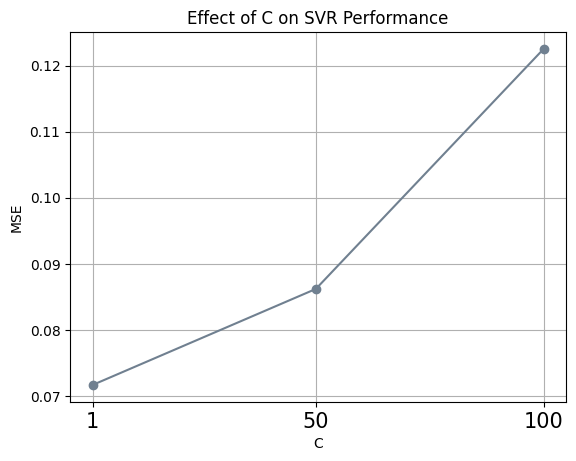

In [30]:
C = [1, 50, 100]
mse_scores = []
from sklearn.metrics import mean_squared_error
for c_param in C:
    svrplot_clf = LinearSVC(C=c_param, dual=True)
    svrplot_clf.fit(loans_prepared_df, labels_prepared)
    mse_scores.append(mean_squared_error(labels_prepared, svrplot_clf.predict(loans_prepared_df)))

plt.plot(C, mse_scores, marker='o', color="slategray")
plt.xlabel('C')
plt.ylabel('MSE')
plt.title('Effect of C on SVR Performance')
plt.xticks(C)
plt.grid(True)
plt.show()

The model with the lowest mse was chosen

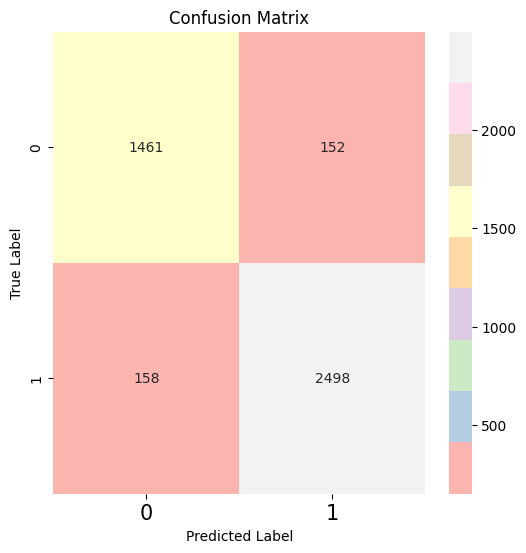

In [31]:
lin_svr_pred = cross_val_predict(lin_svr_clf1, loans_prepared_df, labels_prepared, cv=3)
cm = confusion_matrix(labels_prepared, lin_svr_pred)
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel1")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [32]:
lin_svr_accuracy = accuracy_score(labels_prepared,lin_svr_pred) 
print("Accuracy : ",lin_svr_accuracy)
lin_svr_precision= precision_score(labels_prepared, lin_svr_pred)
print("Precision : ",lin_svr_precision)
lin_svr_recall= recall_score(labels_prepared, lin_svr_pred) 
print("Recall : ",lin_svr_recall)
lin_svr_f1= f1_score(labels_prepared, lin_svr_pred) 
print("F1 Score : ",lin_svr_f1)

Accuracy :  0.9273834621691263
Precision :  0.9426415094339623
Recall :  0.9405120481927711
F1 Score :  0.9415755748209574


**7.2 - Gaussian RBF Kernel using SVC**

*Testing Gamma=5, C=0.001*

In [33]:
rbf_kernel_svc_clf1 = SVC(kernel="rbf", gamma=5, C=0.001)
rbf_kernel_svc_clf1.fit(loans_prepared_df, labels_prepared)

SVC(C=0.001, gamma=5)

In [34]:
svc_rbf_rmse1 = -cross_val_score(rbf_kernel_svc_clf1, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
svc_rbf_rmse1

array([0.61430591, 0.61487762, 0.61487762])

*Testing Gamma=0.1, C=1000*

In [35]:
rbf_kernel_svc_clf2 = SVC(kernel="rbf", gamma=0.1, C=1000)
rbf_kernel_svc_clf2.fit(loans_prepared_df, labels_prepared)

SVC(C=1000, gamma=0.1)

In [36]:
svc_rbf_rmse2 = -cross_val_score(rbf_kernel_svc_clf2, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
svc_rbf_rmse2

array([0.25148889, 0.22179235, 0.26242825])

*Testing Gamma=0.1, C=0.001*

In [37]:
rbf_kernel_svc_clf3 = SVC(kernel="rbf", gamma=0.1, C=0.001)
rbf_kernel_svc_clf3.fit(loans_prepared_df, labels_prepared)

SVC(C=0.001, gamma=0.1)

In [38]:
svc_rbf_rmse3 = -cross_val_score(rbf_kernel_svc_clf3, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
svc_rbf_rmse3

array([0.61430591, 0.61487762, 0.61487762])

*Testing Gamma=5, C=1000*

In [39]:
rbf_kernel_svc_clf4 = SVC(kernel="rbf", gamma=5, C=1000)
rbf_kernel_svc_clf4.fit(loans_prepared_df, labels_prepared)

SVC(C=1000, gamma=5)

In [40]:
svc_rbf_rmse4 = -cross_val_score(rbf_kernel_svc_clf4, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
svc_rbf_rmse4

array([0.61430591, 0.61487762, 0.61487762])

*Conclusion: Gamma=0.1, C=1000 gave the best resulting RMSE.*

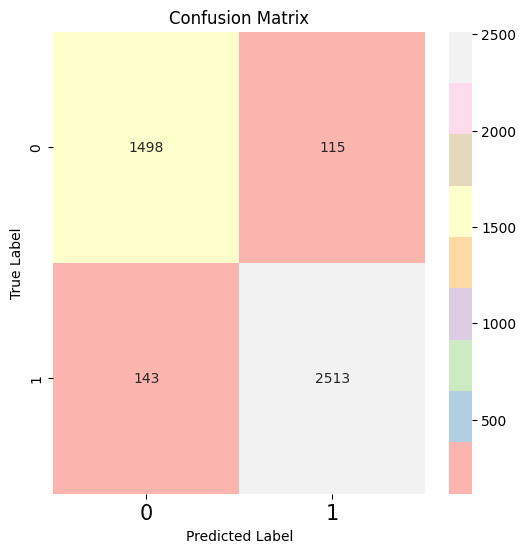

In [41]:
rbf_kernel_pred = cross_val_predict(rbf_kernel_svc_clf2, loans_prepared_df, labels_prepared, cv=3)
cm = confusion_matrix(labels_prepared, rbf_kernel_pred)
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel1")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [42]:
rbf_kernel_accuracy = accuracy_score(labels_prepared,rbf_kernel_pred) 
print("Accuracy : ",lin_svr_accuracy)
rbf_kernel_precision= precision_score(labels_prepared, rbf_kernel_pred)
print("Precision : ",rbf_kernel_precision)
rbf_kernel_recall= recall_score(labels_prepared, rbf_kernel_pred) 
print("Recall : ",rbf_kernel_recall)
rbf_kernel_f1= f1_score(labels_prepared, rbf_kernel_pred) 
print("F1 Score : ",rbf_kernel_f1)

Accuracy :  0.9273834621691263
Precision :  0.9562404870624048
Recall :  0.9461596385542169
F1 Score :  0.9511733535200606


**7.3 - SGDClassifier**

In [43]:
sgd_clf = SGDClassifier(max_iter=1000, loss='perceptron')
sgd_clf.fit(loans_prepared_df, labels_prepared)

SGDClassifier(loss='perceptron')

In [44]:
sgd_clf_rmse = -cross_val_score(sgd_clf, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
sgd_clf_rmse

array([0.34257509, 0.35861058, 0.34665351])

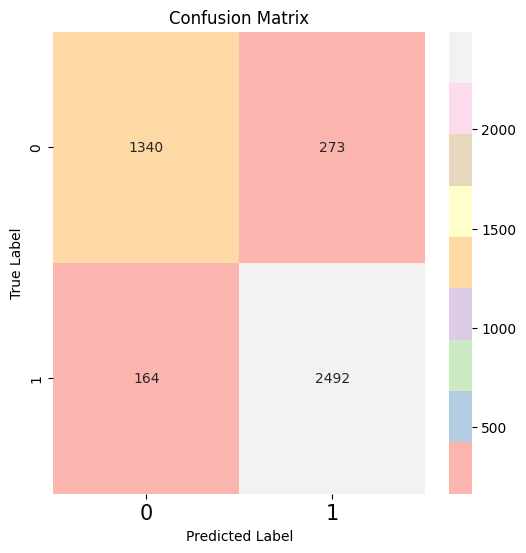

In [45]:
sgd_clf_pred = cross_val_predict(sgd_clf, loans_prepared_df, labels_prepared, cv=3)
cm = confusion_matrix(labels_prepared, sgd_clf_pred)
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel1")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [46]:
sgd_clf_accuracy = accuracy_score(labels_prepared,sgd_clf_pred) 
print("Accuracy : ",sgd_clf_accuracy)
sgd_clf_precision= precision_score(labels_prepared, sgd_clf_pred)
print("Precision : ",sgd_clf_precision)
sgd_clf_recall= recall_score(labels_prepared, sgd_clf_pred) 
print("Recall : ",sgd_clf_recall)
sgd_clf_f1= f1_score(labels_prepared, sgd_clf_pred) 
print("F1 Score : ",sgd_clf_f1)

Accuracy :  0.8976341063480909
Precision :  0.9012658227848102
Recall :  0.9382530120481928
F1 Score :  0.9193875668695812


**7.4 - Decision Tree Classifier**

*Testing max_depth=2*

In [47]:
tree_clf1 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf1.fit(loans_prepared_df, labels_prepared)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [48]:
tree_clf_rmse1 = -cross_val_score(tree_clf1, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
tree_clf_rmse1

array([0.20533982, 0.19837711, 0.21372446])

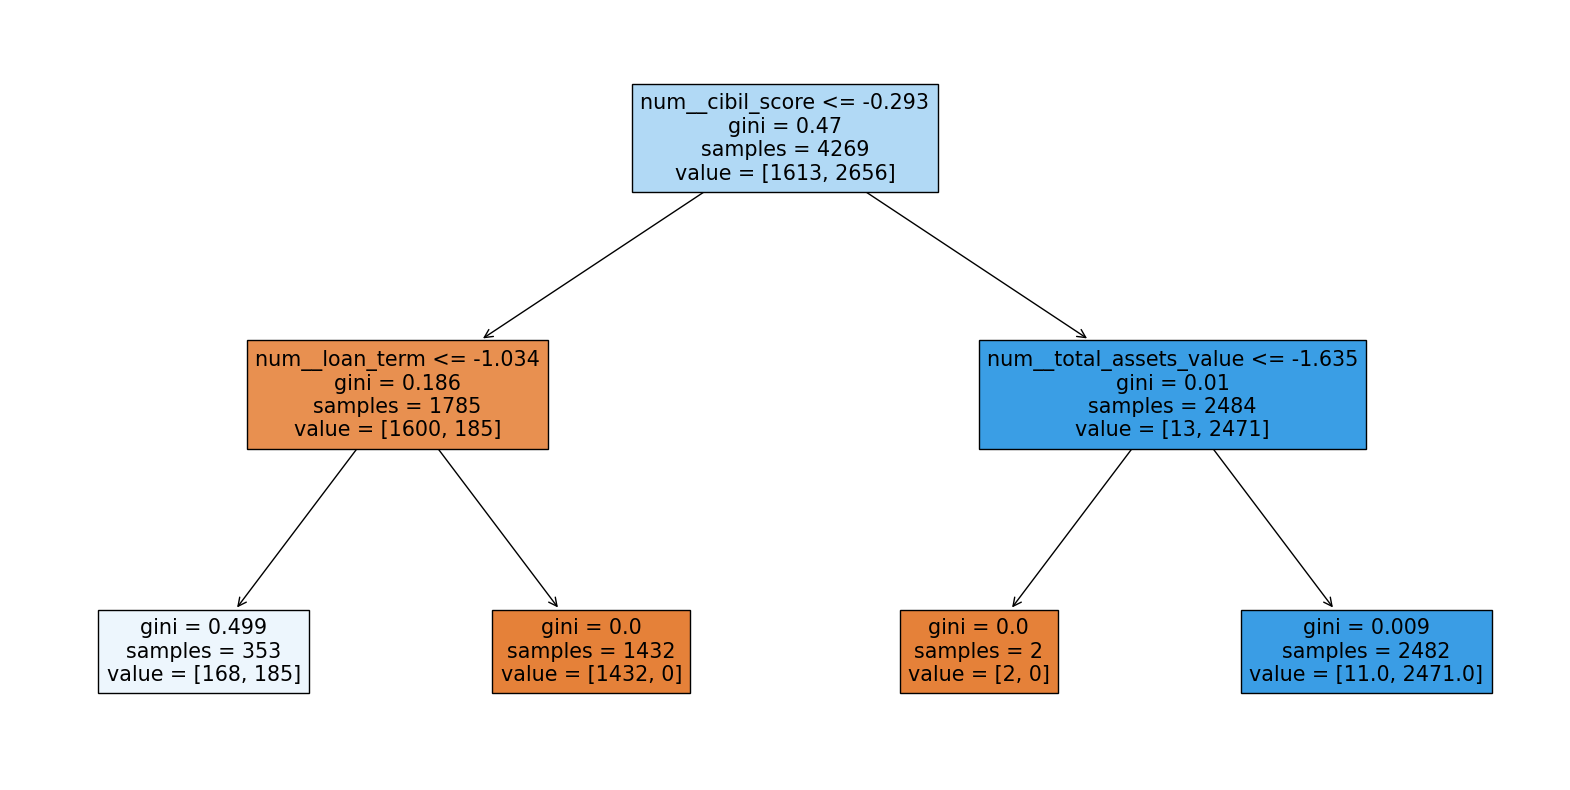

In [49]:
plt.figure(figsize=(20,10))
plot_tree(tree_clf1, filled=True, feature_names=loans_prepared_df.columns)
plt.show()

*Testing max_depth=4*

In [50]:
tree_clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf2.fit(loans_prepared_df, labels_prepared)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [51]:
tree_clf_rmse2 = -cross_val_score(tree_clf2, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
tree_clf_rmse2

array([0.22020242, 0.04591538, 0.06493415])

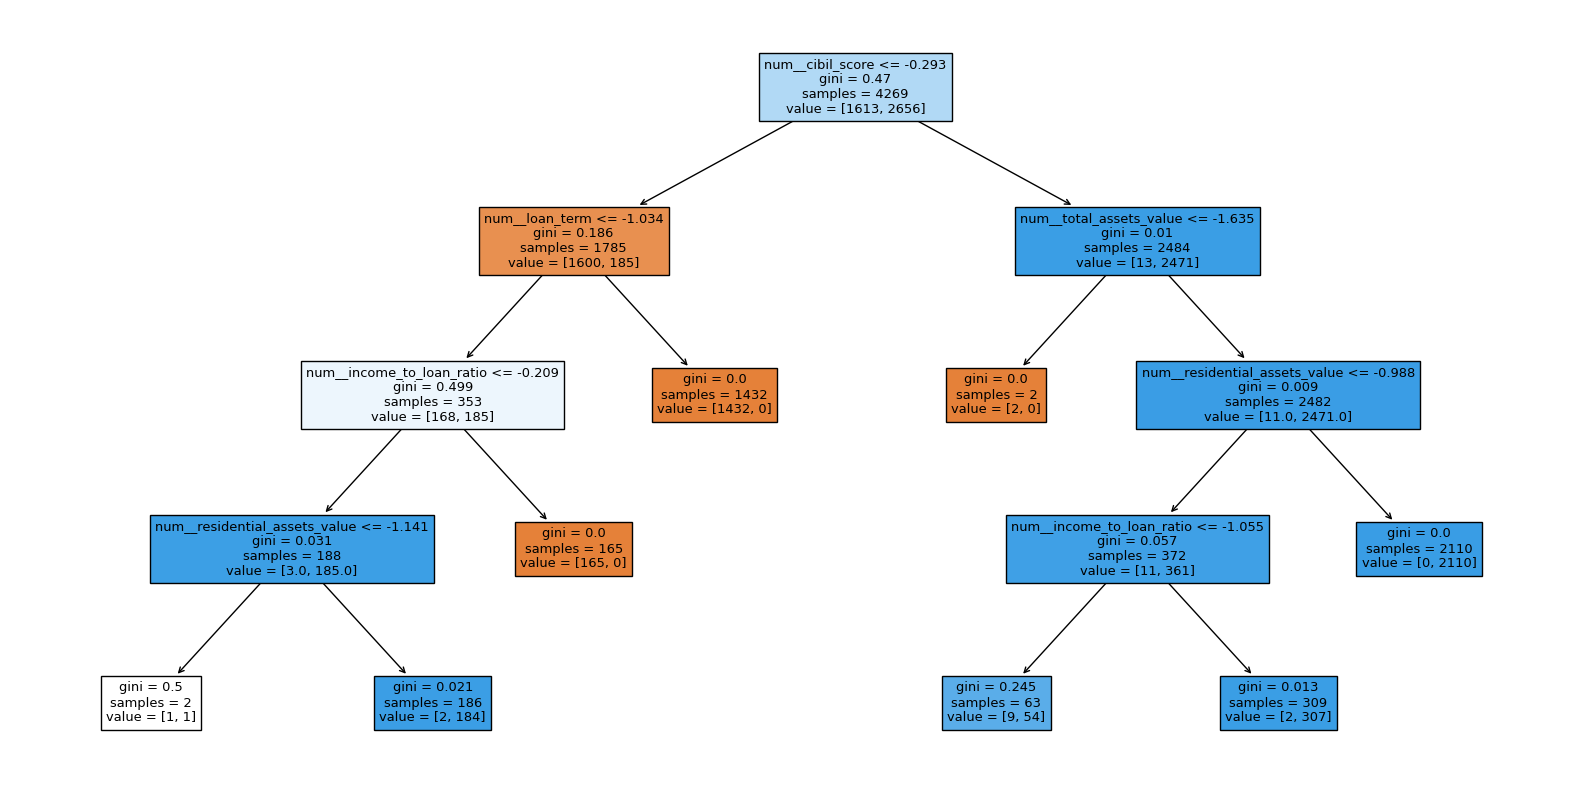

In [52]:
plt.figure(figsize=(20,10))
plot_tree(tree_clf2, filled=True, feature_names=loans_prepared_df.columns)
plt.show()

*Testing max_depth=6*

In [53]:
tree_clf3 = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf3.fit(loans_prepared_df, labels_prepared)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [54]:
tree_clf_rmse3 = -cross_val_score(tree_clf3, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
tree_clf_rmse3

array([0.22179235, 0.0701369 , 0.06493415])

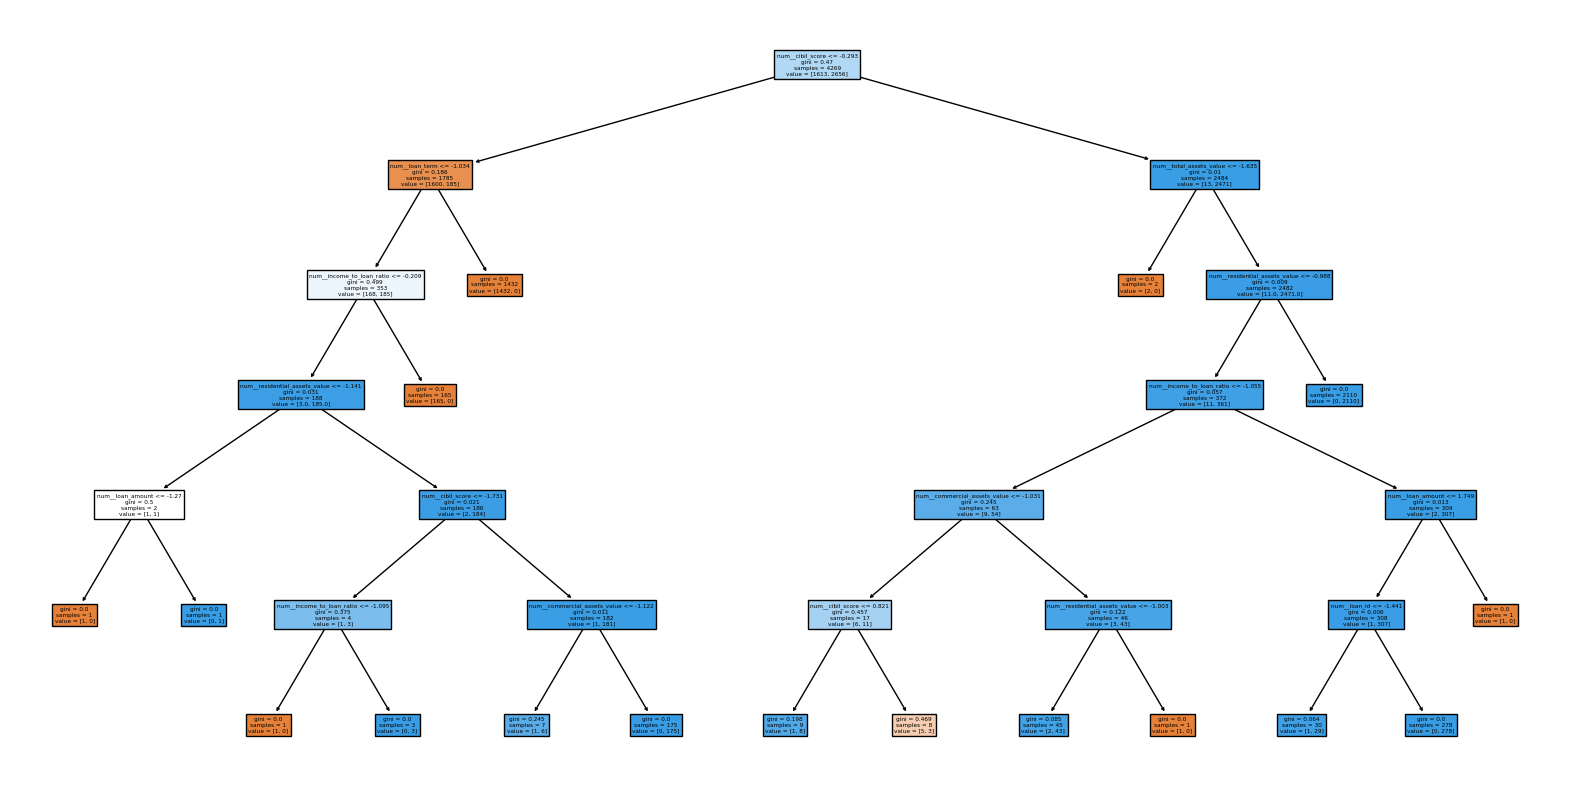

In [55]:
plt.figure(figsize=(20,10))
plot_tree(tree_clf3, filled=True, feature_names=loans_prepared_df.columns)
plt.show()

*Conclusion: best RMSE is when max_depth=4*

*Showcasing the effect of increasing the maximum depth for the decision tree*

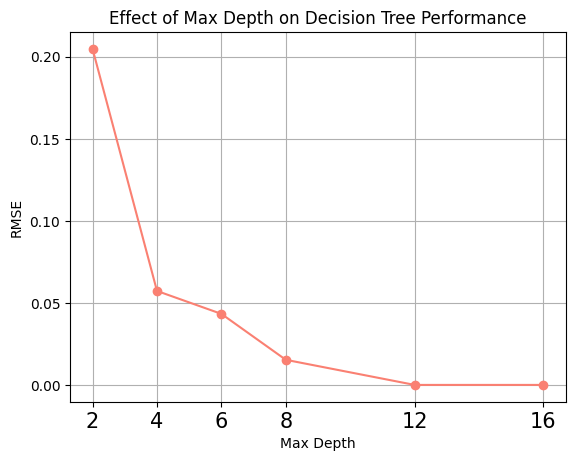

In [56]:
max_depths = [2, 4, 6, 8, 12 ,16]
mse_scores = []
from sklearn.metrics import root_mean_squared_error
for depth in max_depths:
    tree_reg = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_reg.fit(loans_prepared_df, labels_prepared)
    mse_scores.append(root_mean_squared_error(labels_prepared, tree_reg.predict(loans_prepared_df)))

plt.plot(max_depths, mse_scores, marker='o', color="salmon")
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Effect of Max Depth on Decision Tree Performance')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

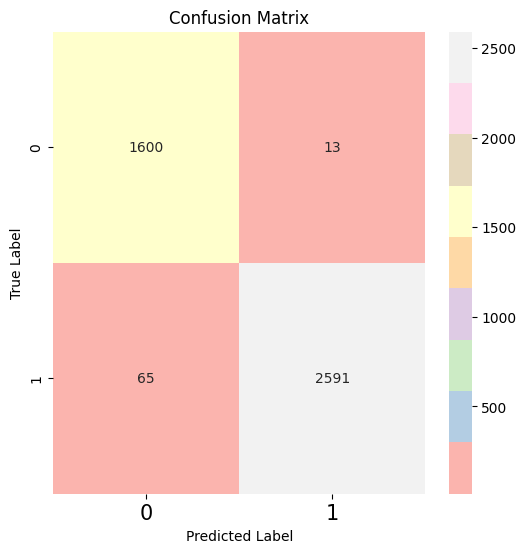

In [57]:
tree_clf_pred = cross_val_predict(tree_clf2, loans_prepared_df, labels_prepared, cv=3)
cm = confusion_matrix(labels_prepared, tree_clf_pred)
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel1")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [58]:
tree_clf_accuracy = accuracy_score(labels_prepared,tree_clf_pred) 
print("Accuracy : ",tree_clf_accuracy)
tree_clf_precision= precision_score(labels_prepared, tree_clf_pred)
print("Precision : ",sgd_clf_precision)
tree_clf_recall= recall_score(labels_prepared, tree_clf_pred) 
print("Recall : ",tree_clf_recall)
tree_clf_f1= f1_score(labels_prepared, tree_clf_pred) 
print("F1 Score : ",tree_clf_f1)

Accuracy :  0.9817287420941673
Precision :  0.9012658227848102
Recall :  0.9755271084337349
F1 Score :  0.9851711026615969


**7.5 - Random Forest Classifier**

*Testing Max depth = 2, n_estimators = 100, bootstrap= True, max_leaf_nodes=100*

In [59]:
rand_forest_clf1 = RandomForestClassifier(max_depth=2,n_estimators=100,bootstrap=True ,max_leaf_nodes=100, random_state=0)
rand_forest_clf1.fit(loans_prepared_df, labels_prepared)

RandomForestClassifier(max_depth=2, max_leaf_nodes=100, random_state=0)

In [60]:
rf_clf_rmse1 = -cross_val_score(rand_forest_clf1, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
rf_clf_rmse1

array([0.15228409, 0.19837711, 0.21207405])

*Testing Max depth = 4, n_estimators = 200, bootstrap = True, max_leaf_nodes=100*

In [61]:
rand_forest_clf2 = RandomForestClassifier(max_depth=4,n_estimators=200,bootstrap=True ,max_leaf_nodes=100, random_state=0)
rand_forest_clf2.fit(loans_prepared_df, labels_prepared)

RandomForestClassifier(max_depth=4, max_leaf_nodes=100, n_estimators=200,
                       random_state=0)

In [62]:
rf_clf_rmse2 = -cross_val_score(rand_forest_clf2, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
rf_clf_rmse2

array([0.07952777, 0.0701369 , 0.06493415])

*Testing Max depth = 6, n_estimators = 100, bootstrap= True, max_leaf_nodes=200*

In [63]:
rand_forest_clf3 = RandomForestClassifier(max_depth=6,n_estimators=100,bootstrap=True ,max_leaf_nodes=200, random_state=0)
rand_forest_clf3.fit(loans_prepared_df, labels_prepared)

RandomForestClassifier(max_depth=6, max_leaf_nodes=200, random_state=0)

In [64]:
rf_clf_rmse3 = -cross_val_score(rand_forest_clf3, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
rf_clf_rmse3

array([0.0701369 , 0.05301851, 0.06493415])

*Conclusion: evaluation was best using max_depth = 6, n_estimators = 100, bootstrap= True, max_leaf_nodes=200*

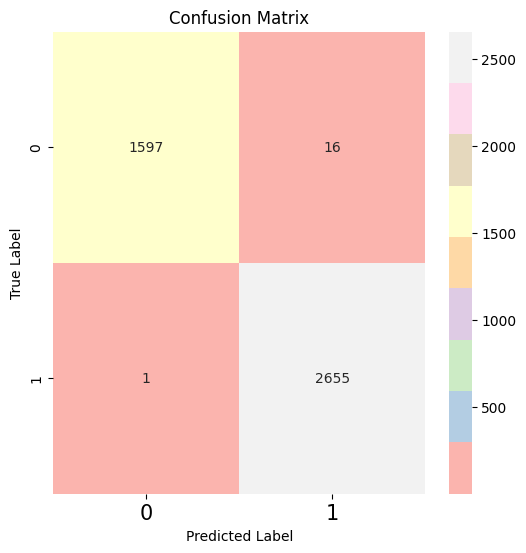

In [65]:
rf_clf_pred = cross_val_predict(rand_forest_clf3, loans_prepared_df, labels_prepared, cv=3)
cm = confusion_matrix(labels_prepared, rf_clf_pred)
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel1")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [66]:
rf_clf_accuracy = accuracy_score(labels_prepared,rf_clf_pred) 
print("Accuracy : ",rf_clf_accuracy)
rf_clf_precision= precision_score(labels_prepared, rf_clf_pred)
print("Precision : ",rf_clf_precision)
rf_clf_recall= recall_score(labels_prepared, rf_clf_pred) 
print("Recall : ",rf_clf_recall)
rf_clf_f1= f1_score(labels_prepared, rf_clf_pred) 
print("F1 Score : ",rf_clf_f1)

Accuracy :  0.9960178027641133
Precision :  0.9940097341819544
Recall :  0.9996234939759037
F1 Score :  0.9968087103435329


**7.6 - K-Nearest Neighbor Classifier**

*Testing n_neighbors=2*

In [67]:
knn_clf1 = KNeighborsClassifier(n_neighbors=2)
knn_clf1.fit(loans_prepared_df, labels_prepared)

KNeighborsClassifier(n_neighbors=2)

In [68]:
knn_clf_rmse1 = -cross_val_score(knn_clf1, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
knn_clf_rmse1

array([0.39852151, 0.39852151, 0.40724293])

*Testing n_neighbors=4*

In [69]:
knn_clf2 = KNeighborsClassifier(n_neighbors=4)
knn_clf2.fit(loans_prepared_df, labels_prepared)

KNeighborsClassifier(n_neighbors=4)

In [70]:
knn_clf_rmse2 = -cross_val_score(knn_clf2, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
knn_clf_rmse2

array([0.33110051, 0.34462034, 0.36056487])

*Testing n_neighbors=6*

In [71]:
knn_clf3 = KNeighborsClassifier(n_neighbors=6)
knn_clf3.fit(loans_prepared_df, labels_prepared)

KNeighborsClassifier(n_neighbors=6)

In [72]:
knn_clf_rmse3 = -cross_val_score(knn_clf3, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
knn_clf_rmse3

array([0.31589425, 0.32467076, 0.33321619])

*Conclusion: n_neighbors=6 gave lowest RMSE.*

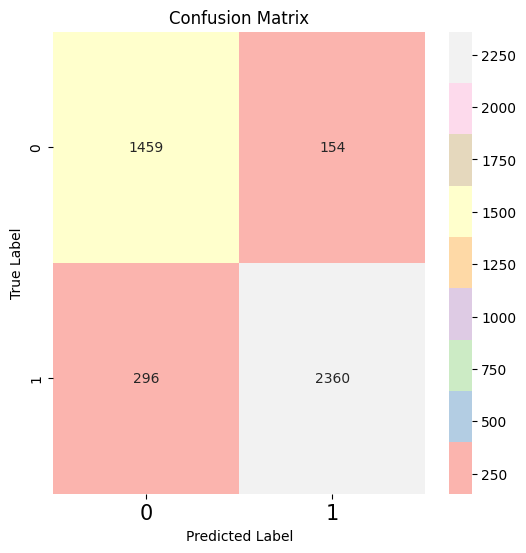

In [73]:
knn_clf_pred = cross_val_predict(knn_clf3, loans_prepared_df, labels_prepared, cv=3)
cm = confusion_matrix(labels_prepared, knn_clf_pred)
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel1")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [74]:
knn_clf_accuracy = accuracy_score(labels_prepared,knn_clf_pred) 
print("Accuracy : ",knn_clf_accuracy)
knn_clf_precision= precision_score(labels_prepared, knn_clf_pred)
print("Precision : ",knn_clf_precision)
knn_clf_recall= recall_score(labels_prepared, knn_clf_pred) 
print("Recall : ",knn_clf_recall)
knn_clf_f1= f1_score(labels_prepared, knn_clf_pred) 
print("F1 Score : ",knn_clf_f1)

Accuracy :  0.8945888966971187
Precision :  0.9387430389817024
Recall :  0.8885542168674698
F1 Score :  0.9129593810444874


**Logistic Regression**

In [75]:
lgs_clf = LogisticRegression(random_state=42, n_jobs=-1)
lgs_clf.fit(loans_prepared_df,labels_prepared)

LogisticRegression(n_jobs=-1, random_state=42)

In [76]:
lgs_clf_rmse = -cross_val_score(knn_clf3, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
lgs_clf_rmse

array([0.31589425, 0.32467076, 0.33321619])

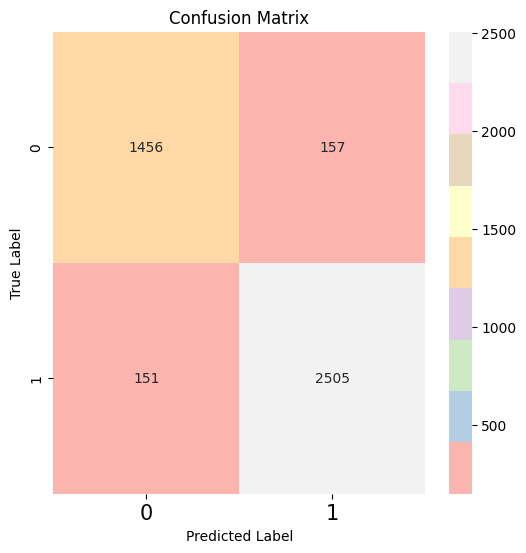

In [77]:
from sklearn.metrics import confusion_matrix
lgs_clf_pred = cross_val_predict(lgs_clf, loans_prepared_df, loans_labels, cv=3)
y_pred = lgs_clf.predict(loans_prepared_df)

cm = confusion_matrix(labels_prepared, y_pred)

plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel1")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [78]:
lgs_clf_accuracy = accuracy_score(labels_prepared,y_pred) 
print("Accuracy : ",lgs_clf_accuracy)
lgs_clf_precision= precision_score(labels_prepared, y_pred)
print("Precision : ",lgs_clf_precision)
lgs_clf_recall= recall_score(labels_prepared, y_pred) 
print("Recall : ",lgs_clf_recall)
lgs_clf_f1= f1_score(labels_prepared, y_pred) 
print("F1 Score : ",lgs_clf_f1)

Accuracy :  0.9278519559615835
Precision :  0.9410217881292261
Recall :  0.9431475903614458
F1 Score :  0.9420834900338473


In [79]:
data = {
    'Linear SVC': [lin_svr_f1, lin_svr_recall, lin_svr_precision, lin_svr_accuracy],
    'Gaussian RBF\nKernel SVC': [rbf_kernel_f1, rbf_kernel_recall, rbf_kernel_precision, rbf_kernel_accuracy],
    'SGD\nClassifier': [sgd_clf_f1, sgd_clf_recall, sgd_clf_precision, sgd_clf_accuracy],
    'Decision\nTree\nClassifier': [tree_clf_f1, tree_clf_recall, tree_clf_precision, tree_clf_accuracy],
    'Random\nForest\nClassifier': [rf_clf_f1, rf_clf_recall, rf_clf_precision, rf_clf_accuracy],
    'KNN\nClassifier': [knn_clf_f1, knn_clf_recall, knn_clf_precision, knn_clf_accuracy],
    'Logistic\nRegression': [lgs_clf_f1, lgs_clf_recall, lgs_clf_precision, lgs_clf_accuracy],
}

stats_df = pd.DataFrame(data, index=['F1', 'Recall', 'Precision', 'Accuracy'])
print(stats_df)

           Linear SVC  Gaussian RBF\nKernel SVC  SGD\nClassifier  \
F1           0.941576                  0.951173         0.919388   
Recall       0.940512                  0.946160         0.938253   
Precision    0.942642                  0.956240         0.901266   
Accuracy     0.927383                  0.939564         0.897634   

           Decision\nTree\nClassifier  Random\nForest\nClassifier  \
F1                           0.985171                    0.996809   
Recall                       0.975527                    0.999623   
Precision                    0.995008                    0.994010   
Accuracy                     0.981729                    0.996018   

           KNN\nClassifier  Logistic\nRegression  
F1                0.912959              0.942083  
Recall            0.888554              0.943148  
Precision         0.938743              0.941022  
Accuracy          0.894589              0.927852  


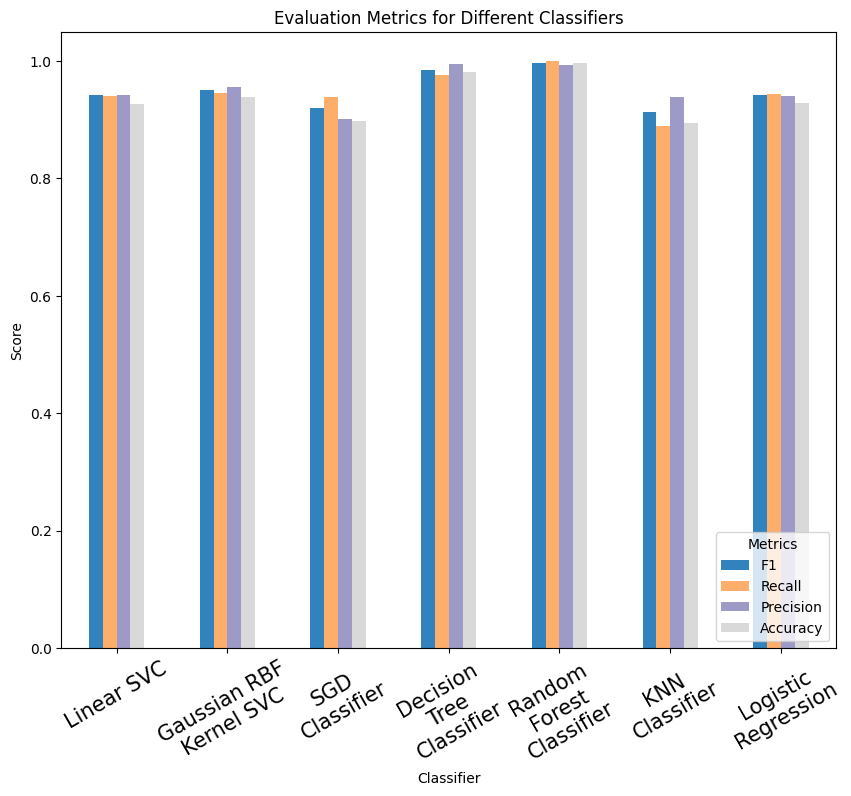

In [80]:
stats_df = stats_df.transpose()

stats_df.plot(kind='bar', figsize=(10, 8), colormap="tab20c")
plt.title('Evaluation Metrics for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.legend(title='Metrics', loc="lower right")
plt.xticks(rotation=30)
plt.show()

## Classification Using Neural Networks

**7.7 - Perceptron**

In [81]:
per_clf = Perceptron(random_state=42)
per_clf.fit(loans_prepared_df, labels_prepared)

Perceptron(random_state=42)

In [82]:
per_clf_rmse = -cross_val_score(per_clf, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
per_clf_rmse

array([0.28304141, 0.30225203, 0.31366175])

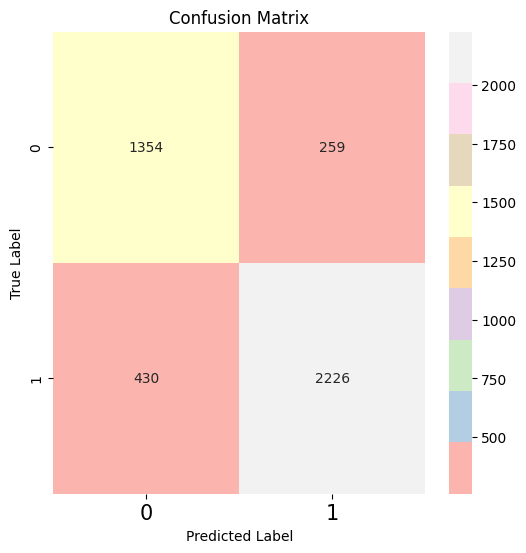

In [83]:
from sklearn.metrics import confusion_matrix
y_pred = per_clf.predict(loans_prepared_df)

cm = confusion_matrix(labels_prepared, y_pred)

plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel1")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

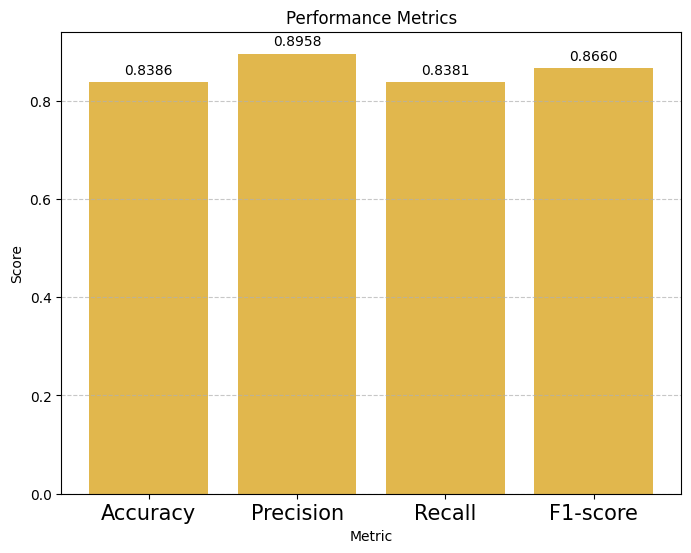

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve

accuracy = accuracy_score(labels_prepared, y_pred)
precision = precision_score(labels_prepared, y_pred)
recall = recall_score(labels_prepared, y_pred)
f1 = f1_score(labels_prepared, y_pred)

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color='goldenrod', alpha=0.8)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(metric_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom') 
plt.show()

**Sequential Neural Network**

*Keras offers two main approaches for building neural networks: Sequential API and Functional API. The Sequential API is ideal for simple models where layers are stacked one after another. It's user-friendly but has limited flexibility in terms of sharing layers or creating complex architectures.*

The code checks if the directory 'my_checkpoints' exists. If not, it creates the directory. This directory will be used to save the best model checkpoints during training.
It has an input layer with 17 features, three fully connected hidden layers (Dense) with ReLU activation functions and dropout regularization to prevent overfitting, and
an output layer (Dense) with a single neuron and sigmoid activation function, suitable for binary classification.

EarlyStopping: Monitors the validation loss and stops training if there's no improvement for a certain number of epochs (patience). It restores the best model weights (restore_best_weights=True) when training stops.
ModelCheckpoint: Saves the best model weights during training to the specified filepath (my_checkpoints/best_model.keras) when save_best_only=True.

In [85]:
from tensorflow import keras
from keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.utils import plot_model

import tensorflow as tf
import os

if not os.path.exists('my_checkpoints'):
    os.makedirs('my_checkpoints')

model = keras.models.Sequential([
    keras.layers.Input(shape=(17,), name='Input'),
    keras.layers.Dense(32, activation="relu", kernel_initializer="he_normal", name='Dense_1'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(16, activation="relu", kernel_initializer="he_normal", name='Hidden_1'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(8, activation="relu", kernel_initializer="he_normal", name='Hidden_2'),
    keras.layers.Dense(1, activation="sigmoid", kernel_initializer="GlorotUniform", name='Output')
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint_cb = ModelCheckpoint("my_checkpoints/best_model.keras", save_best_only=True)

history = model.fit(
    loans_prepared_df,
    labels_prepared,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping_cb, model_checkpoint_cb]
)



Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4081 - loss: 1.1356 - val_accuracy: 0.5796 - val_loss: 0.6634
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6533 - loss: 0.6260 - val_accuracy: 0.7974 - val_loss: 0.5523
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.4885 - val_accuracy: 0.8618 - val_loss: 0.3825
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.3616 - val_accuracy: 0.8970 - val_loss: 0.2874
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8845 - loss: 0.2895 - val_accuracy: 0.9087 - val_loss: 0.2442
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9005 - loss: 0.2602 - val_accuracy: 0.9215 - val_loss: 0.2240
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9029 - loss: 0.2443 - val_accuracy: 0.9286 - val_loss: 0.2056
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9014 - loss: 0.2334 - val_accu

In [86]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                      │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_1 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_2 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,749 (14.65 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,500 (9.77 KB)

In [87]:
loss, accuracy = model.evaluate(loans_prepared_df, labels_prepared)
accuracy*100 ,loss*100

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.9922 - loss: 0.0352


(99.1801381111145, 3.5615645349025726)

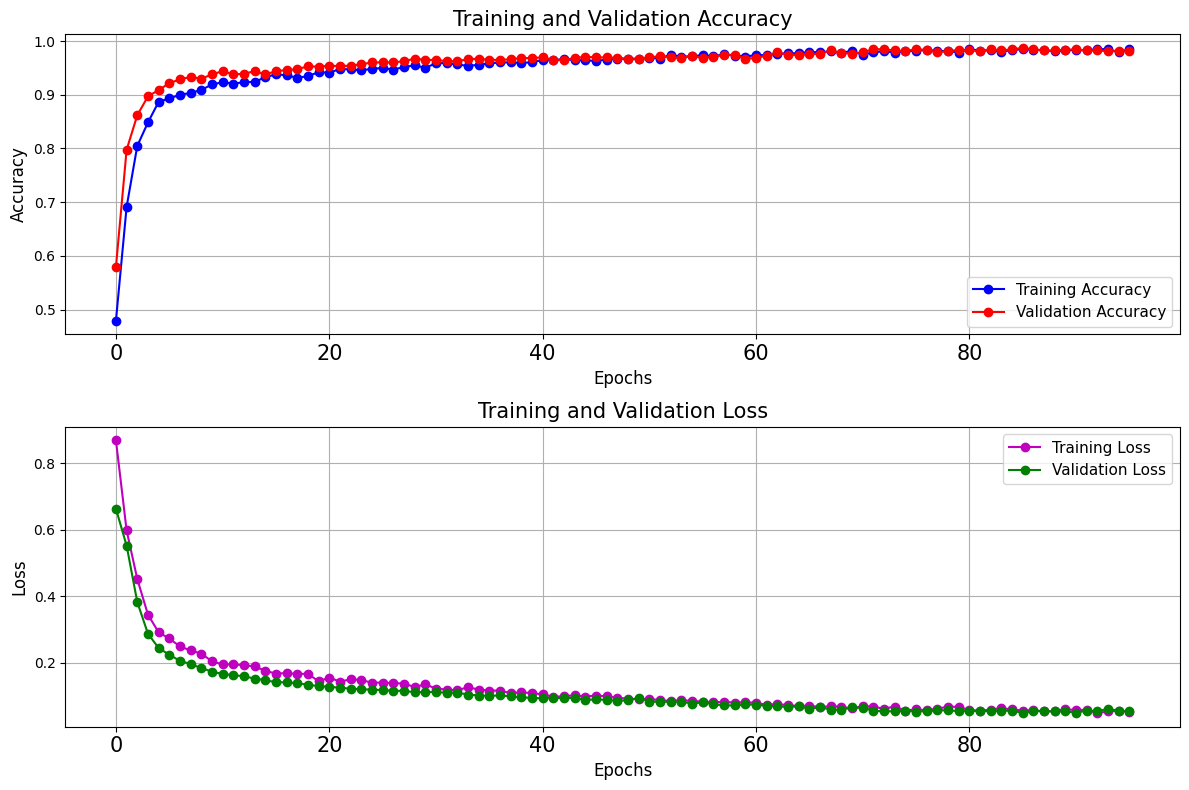

In [88]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(acc_train, 'bo-', label='Training Accuracy')
plt.plot(acc_val, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True)

loss_train = history.history['loss']
loss_val = history.history['val_loss']

plt.subplot(2, 1, 2)
plt.plot(loss_train, 'mo-', label='Training Loss')
plt.plot(loss_val, 'go-', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True)

plt.tight_layout()

If the probability is greater than 0.5, the sample is classified as class 1 (positive class). Otherwise, it is classified as class 0 (negative class). This threshold of 0.5 is commonly used for binary classification problems.

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


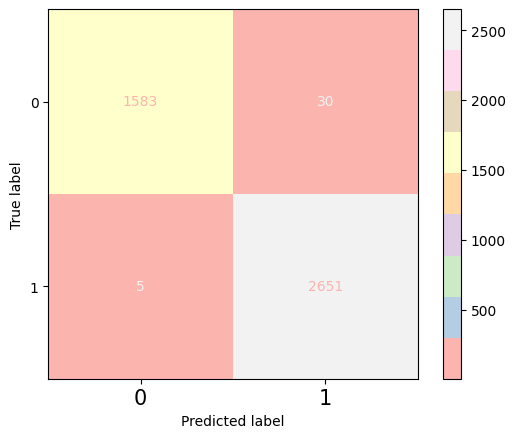

In [89]:
y_proba = model.predict(loans_prepared_df)
Seq_pred_classes = (y_proba > 0.5).astype(int)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(labels_prepared,Seq_pred_classes,cmap="Pastel1")


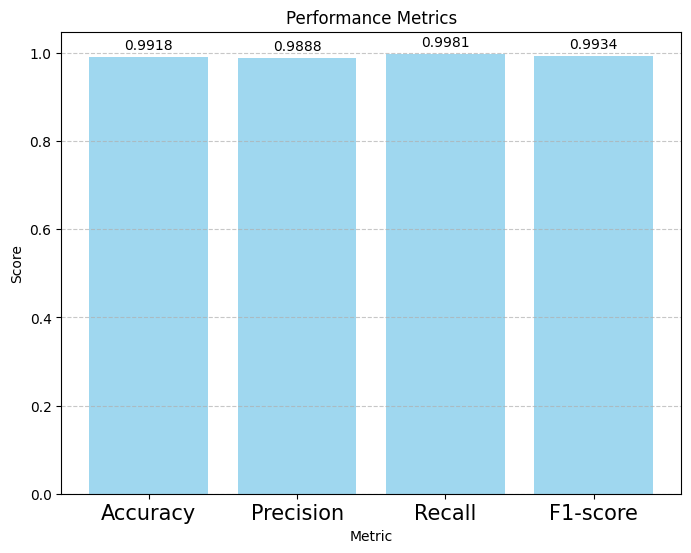

In [90]:
accuracy = accuracy_score(labels_prepared, Seq_pred_classes)
precision = precision_score(labels_prepared, Seq_pred_classes)
recall = recall_score(labels_prepared, Seq_pred_classes)
f1 = f1_score(labels_prepared, Seq_pred_classes)

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color='skyblue', alpha=0.8)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(metric_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom') 
plt.show()

**Functional Neural Network**

*The Functional API provides more control, allowing for building intricate models with shared layers, multiple inputs/outputs, and intricate connections. While the Functional API offers more power, it comes with a steeper learning curve.*

In [91]:
#Clearing global state in memory to avoid clutter from old models.
tf.keras.backend.clear_session()

In [92]:
import os
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Ensuring that the checkpoint directory exists
if not os.path.exists('my_checkpoints_2'):
    os.makedirs('my_checkpoints_2')

Fun_train_wide = loans_prepared_df.iloc[:, 3:5].values
Fun_train_deep = loans_prepared_df.iloc[:, [i for i in range(loans_prepared_df.shape[1]) if i not in [3, 4]]].values

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_layer_wide.adapt(Fun_train_wide)
norm_layer_deep.adapt(Fun_train_deep)

input_wide = tf.keras.layers.Input(shape=[2])  
input_deep = tf.keras.layers.Input(shape=[Fun_train_deep.shape[1]])
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")(norm_wide)
hidden2 = tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")(norm_deep)
hidden3 = tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")(hidden2)
concat = tf.keras.layers.concatenate([hidden1, hidden3])
output = tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="GlorotUniform")(concat)
aux_output = tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="GlorotUniform")(hidden1)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'accuracy'])

early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint_cb = ModelCheckpoint("my_checkpoints_2/best_model.keras", save_best_only=True)

history = model.fit(
    (Fun_train_wide, Fun_train_deep),
    (labels_prepared, labels_prepared),
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping_cb, model_checkpoint_cb],
)


Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - dense_3_accuracy: 0.6148 - dense_4_accuracy: 0.5522 - loss: 1.3320 - val_dense_3_accuracy: 0.8478 - val_dense_4_accuracy: 0.6499 - val_loss: 1.0323
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_3_accuracy: 0.8878 - dense_4_accuracy: 0.6108 - loss: 0.9865 - val_dense_3_accuracy: 0.9157 - val_dense_4_accuracy: 0.6499 - val_loss: 0.8882
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_3_accuracy: 0.9274 - dense_4_accuracy: 0.6121 - loss: 0.8738 - val_dense_3_accuracy: 0.9204 - val_dense_4_accuracy: 0.6499 - val_loss: 0.8532
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_3_accuracy: 0.9351 - dense_4_accuracy: 0.6194 - loss: 0.8416 - val_dense_3_accuracy: 0.9262 - val_dense_4_accuracy: 0.6499 - val_loss: 0.8331
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_3_accuracy: 0.9397 - dense_4_accuracy: 0.6113 - loss: 0.8249 - val_dense_3_accuracy: 0.9286 - val_dense_4_accuracy: 0.6499 - va

In [93]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 15)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer (InputLayer)      │ (None, 2)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 15)                │              31 │ input_layer_1[0][0]        │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 2)                 │               5 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 30)                │             480 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 30)                │              90 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 30)                │             930 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 60)                │               0 │ dense[0][0], dense_2[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 1)                 │              61 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 1)                 │              31 │ dense[0][0]                │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 4,814 (18.82 KB)

 Trainable params: 1,592 (6.22 KB)

 Non-trainable params: 36 (152.00 B)

 Optimizer params: 3,186 (12.45 KB)

*There are two types of predictions: main/primary and auxiliary. The main prediction tackles the core objective, it's the network's final, desired output. Auxiliary predictions, on the other hand, are secondary outputs that don't directly address the main goal but support the learning process. These assistants can be intermediate outputs capturing relevant features or separate branches focusing on related sub-tasks. By providing additional learning objectives or acting as regularizers, auxiliary predictions can significantly enhance the network's ability to learn complex relationships and features, ultimately leading to better performance on the main task.*

*The next few code blocks are responsible for assessing and comparing the performances of both the primary and auxiliary predictions; in terms of Accuracy, Precision, Recall, and F1 scores, along with a confusion matrix for each.*

In [94]:
y_pred_main, y_pred_aux = model.predict((Fun_train_wide,Fun_train_deep))
y_pred_main_classes = (y_pred_main > 0.5).astype(int)
y_pred_aux_classes = (y_pred_aux > 0.5).astype(int)
main_acc=accuracy_score(labels_prepared,y_pred_main_classes) 
aux_acc=accuracy_score(labels_prepared,y_pred_aux_classes) 

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [95]:
main_f1=f1_score(labels_prepared,y_pred_main_classes) 
aux_f1=f1_score(labels_prepared,y_pred_aux_classes) 
main_recall=recall_score(labels_prepared,y_pred_main_classes) 
aux_recall=recall_score(labels_prepared,y_pred_aux_classes) 
aux_precision=precision_score(labels_prepared,y_pred_aux_classes) 
main_precision=precision_score(labels_prepared,y_pred_main_classes) 

print("Accuracy of primary prediction: ",main_acc)
print("Precision of primary prediction: ",main_precision)
print("Recall of primary prediction: ",main_recall)
print("F1 score of primary prediction: ",main_f1)

Accuracy of primary prediction:  0.9838369641602249
Precision of primary prediction:  0.9860954528372792
Recall of primary prediction:  0.9879518072289156
F1 score of primary prediction:  0.9870227571939063


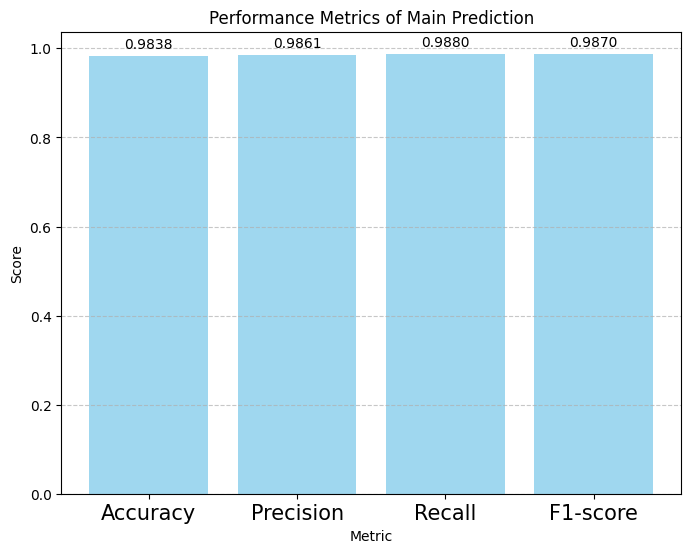

In [96]:
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [main_acc, main_precision, main_recall, main_f1]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color='skyblue', alpha=0.8)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics of Main Prediction')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(metric_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom') 
plt.show()

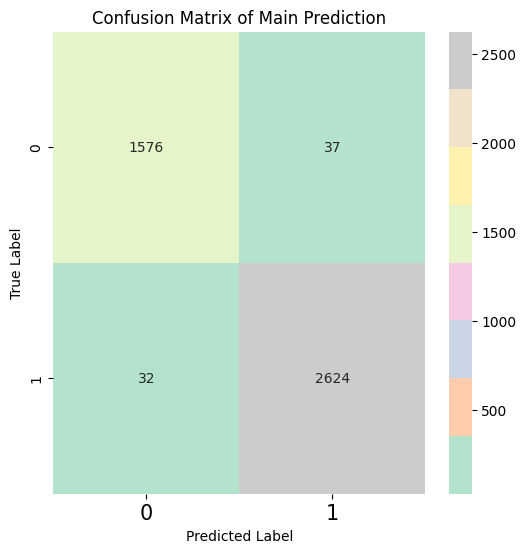

In [97]:
cm = confusion_matrix(labels_prepared, y_pred_main_classes)
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel2")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Main Prediction')
plt.show()

In [98]:
print("Accuracy of primary prediction: ",aux_acc)
print("Precision of primary prediction: ",aux_precision)
print("Recall of primary prediction: ",aux_recall)
print("F1 score of primary prediction: ",aux_f1)

Accuracy of primary prediction:  0.6216912625907707
Precision of primary prediction:  0.6234875444839858
Recall of primary prediction:  0.9894578313253012
F1 score of primary prediction:  0.7649541551448116


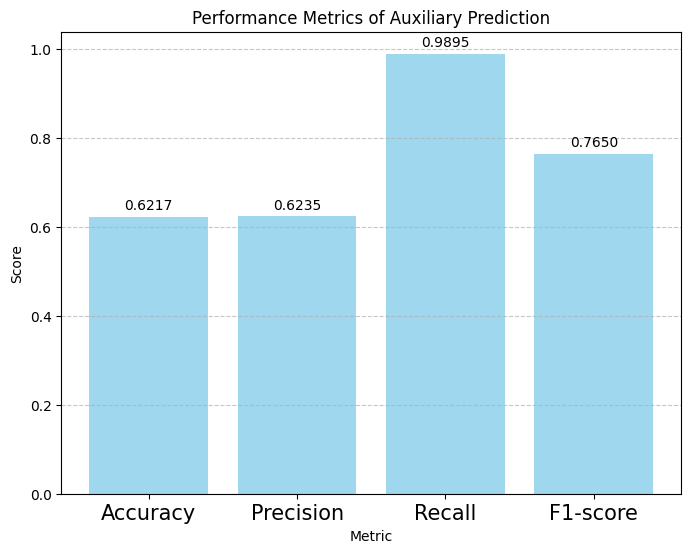

In [99]:
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [aux_acc, aux_precision, aux_recall, aux_f1]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color='skyblue', alpha=0.8)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics of Auxiliary Prediction')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(metric_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom') 
plt.show()

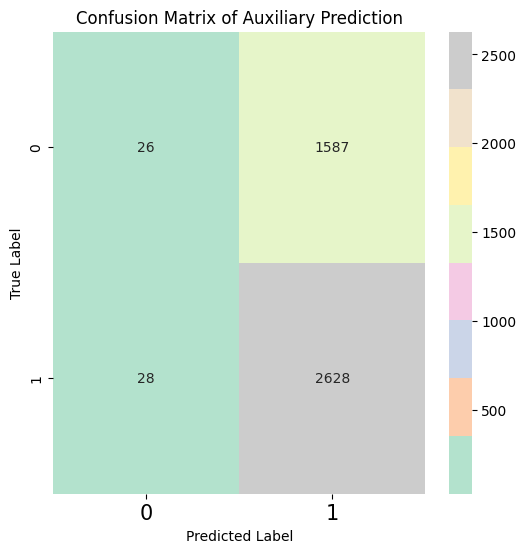

In [100]:
cm = confusion_matrix(labels_prepared, y_pred_aux_classes)
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel2")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Auxiliary Prediction')
plt.show()

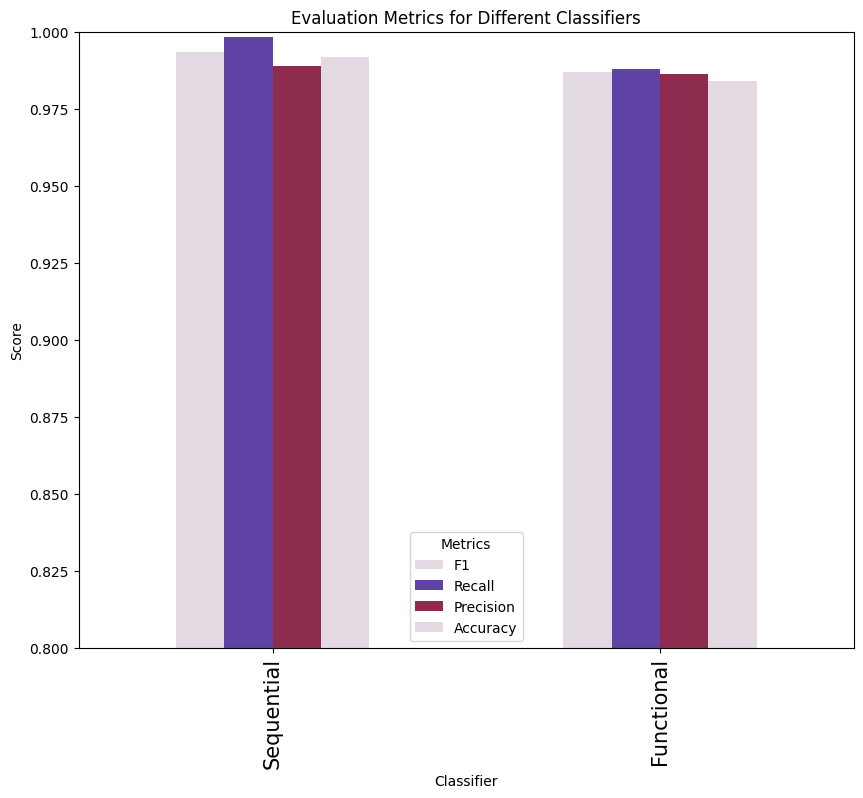

In [101]:
data = {
    'Sequential': [f1, recall, precision, accuracy],
    'Functional': [main_f1, main_recall, main_precision, main_acc]
}

df = pd.DataFrame(data, index=['F1', 'Recall', 'Precision', 'Accuracy'])

df = df.transpose()
df.plot(kind='bar', figsize=(10, 8), colormap="twilight")
plt.title('Evaluation Metrics for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.legend(title='Metrics')
plt.ylim(0.8,1)
plt.show()


**7.8 - MLP**

One hidden layer with 5 neurons

In [102]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes=[5], max_iter=10000, random_state=42)
mlp_clf1.fit(loans_prepared_df, labels_prepared)

MLPClassifier(hidden_layer_sizes=[5], max_iter=10000, random_state=42)

In [103]:
mlp_clf_rmse1 = -cross_val_score(mlp_clf1, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
mlp_clf_rmse1

array([0.1545742 , 0.16341403, 0.17179962])

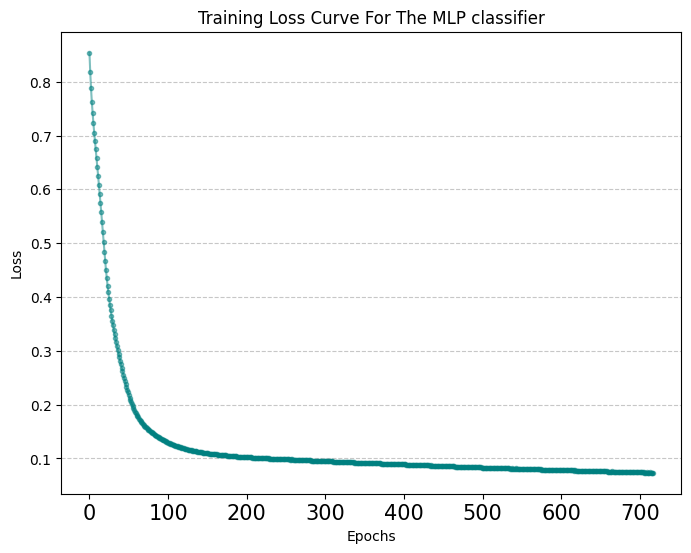

In [104]:
loss_history = mlp_clf1.loss_curve_

plt.figure(figsize=(8, 6))
plt.plot(loss_history, marker=".",  color="teal", alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve For The MLP classifier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

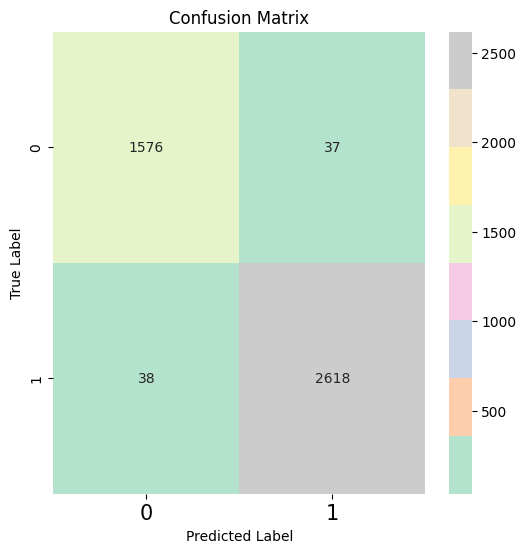

In [105]:
from sklearn.metrics import confusion_matrix
y_pred = mlp_clf1.predict(loans_prepared_df)

cm = confusion_matrix(labels_prepared, y_pred)

plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel2")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

*Displaying the ROC curve: the Receiver Operating Characteristics, which plots the true positive rate against the false positive rate. The dotted line represents the ROC curve of a purely random classifier, and a good classifier stays as far away from that dotted line as possible.*

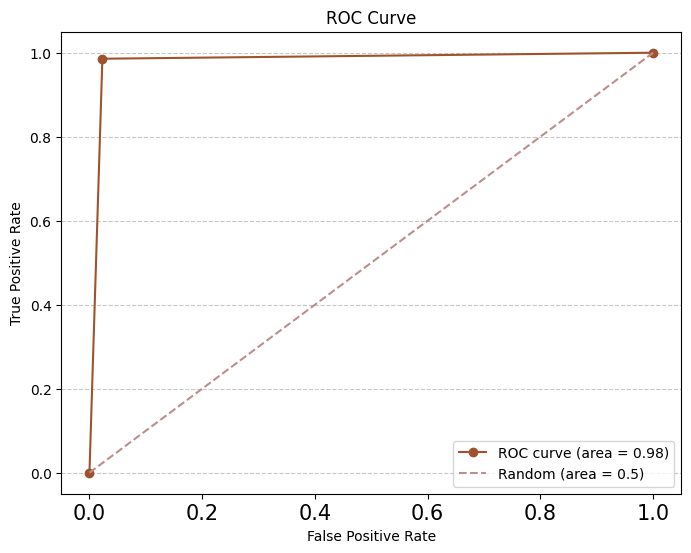

In [106]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(labels_prepared, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', label='ROC curve (area = %0.2f)' % roc_auc, color="sienna")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random (area = 0.5)', color="rosybrown")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

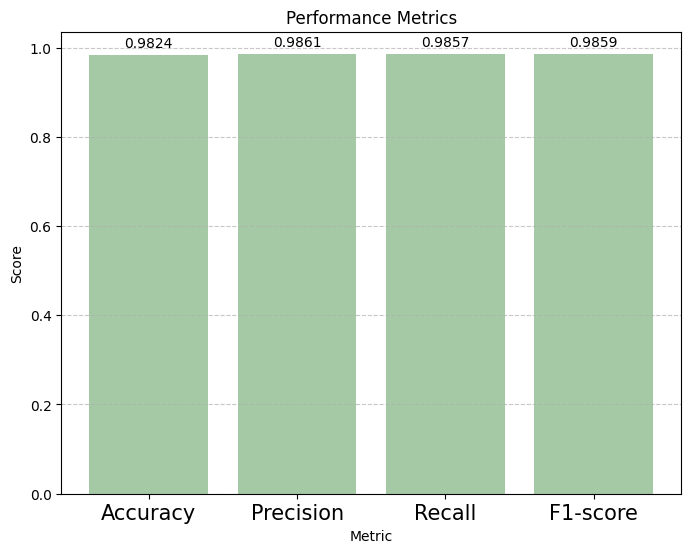

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve

accuracy = accuracy_score(labels_prepared, y_pred)
precision = precision_score(labels_prepared, y_pred)
recall = recall_score(labels_prepared, y_pred)
f1 = f1_score(labels_prepared, y_pred)

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color='darkseagreen', alpha=0.8)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(metric_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom') 
plt.show()

One hidden layer with 20 neurons

In [108]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=[30], max_iter=10000, random_state=42)
mlp_clf2.fit(loans_prepared_df, labels_prepared)

MLPClassifier(hidden_layer_sizes=[30], max_iter=10000, random_state=42)

In [109]:
mlp_clf_rmse2 = -cross_val_score(mlp_clf2, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
mlp_clf_rmse2

array([0.20188848, 0.19480246, 0.20704391])

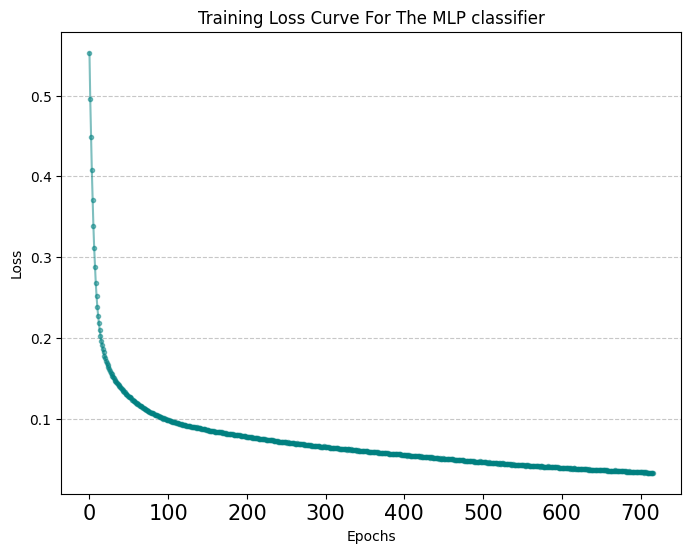

In [110]:
loss_history = mlp_clf2.loss_curve_

plt.figure(figsize=(8, 6))
plt.plot(loss_history, marker=".",  color="teal", alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve For The MLP classifier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

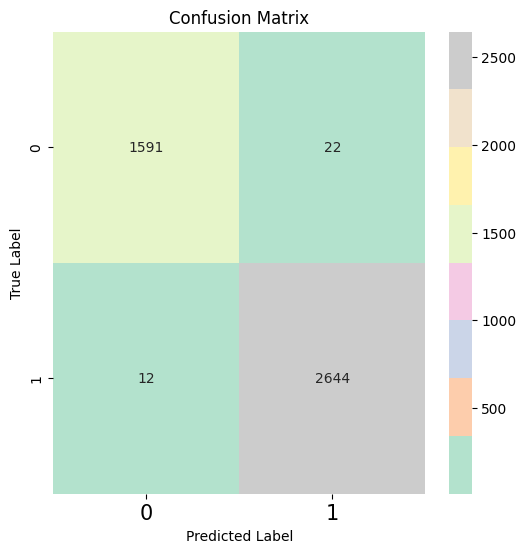

In [111]:
from sklearn.metrics import confusion_matrix
y_pred = mlp_clf2.predict(loans_prepared_df)

cm = confusion_matrix(labels_prepared, y_pred)

plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel2")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

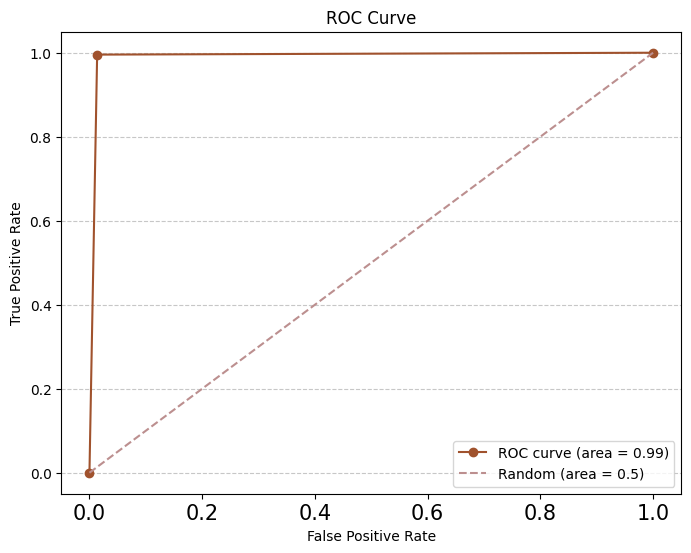

In [112]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(labels_prepared, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', label='ROC curve (area = %0.2f)' % roc_auc, color="sienna")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random (area = 0.5)', color="rosybrown")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

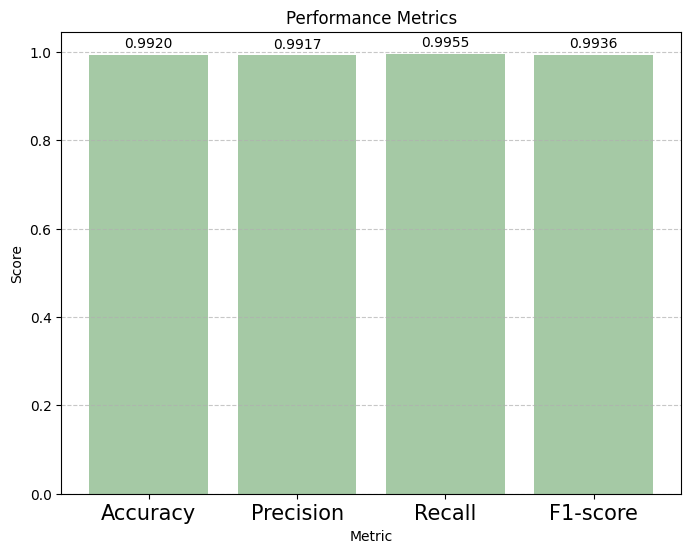

In [113]:
accuracy = accuracy_score(labels_prepared, y_pred)
precision = precision_score(labels_prepared, y_pred)
recall = recall_score(labels_prepared, y_pred)
f1 = f1_score(labels_prepared, y_pred)

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color='darkseagreen', alpha=0.8)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(metric_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom') 
plt.show()

Two layers with layer 1 = 5 neurons, layer 2 = 20 neurons

In [114]:
mlp_clf3 = MLPClassifier(hidden_layer_sizes=(5,20), max_iter=10000, random_state=42)
mlp_clf3.fit(loans_prepared_df, labels_prepared)

MLPClassifier(hidden_layer_sizes=(5, 20), max_iter=10000, random_state=42)

In [115]:
mlp_clf_rmse3 = -cross_val_score(mlp_clf3, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
mlp_clf_rmse3

array([0.17584252, 0.10930047, 0.1298683 ])

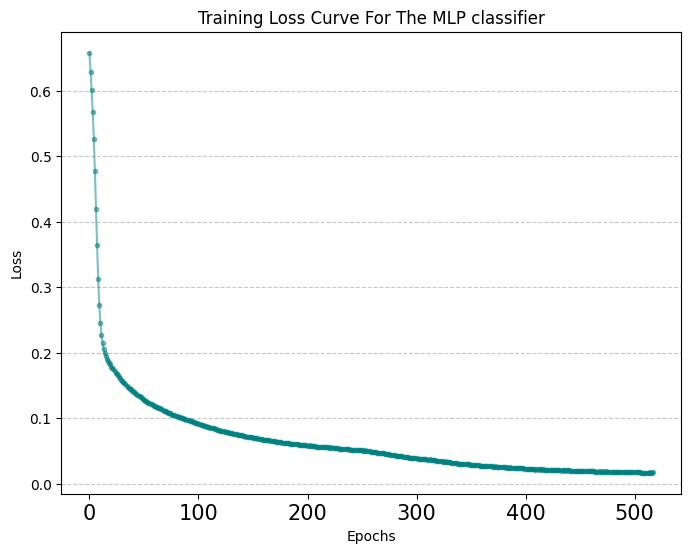

In [116]:
loss_history = mlp_clf3.loss_curve_

plt.figure(figsize=(8, 6))
plt.plot(loss_history, marker=".",  color="teal", alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve For The MLP classifier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

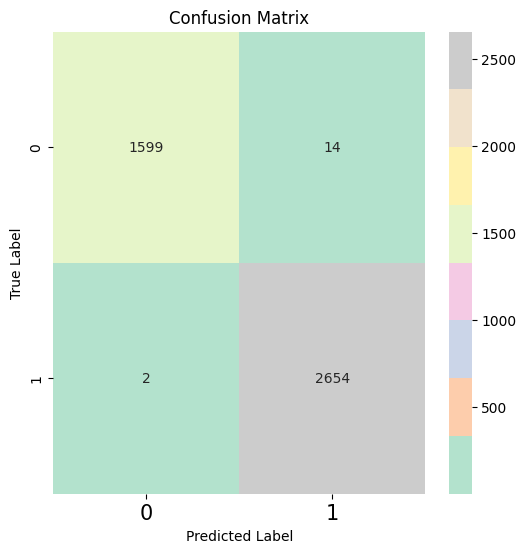

In [117]:
y_pred = mlp_clf3.predict(loans_prepared_df)

cm = confusion_matrix(labels_prepared, y_pred)

plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel2")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

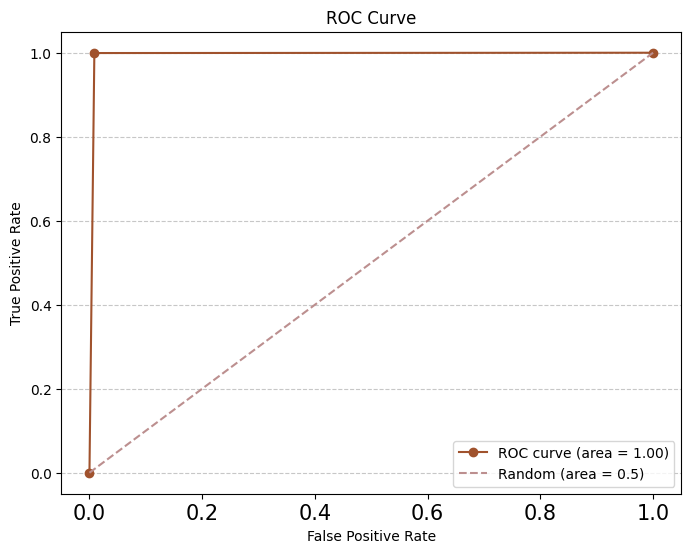

In [118]:
fpr, tpr, thresholds = roc_curve(labels_prepared, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', label='ROC curve (area = %0.2f)' % roc_auc, color="sienna")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random (area = 0.5)', color="rosybrown")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

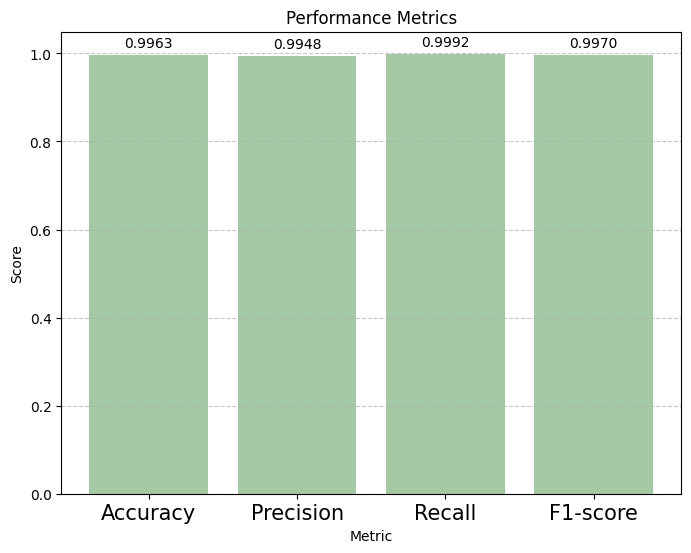

In [119]:
accuracy = accuracy_score(labels_prepared, y_pred)
precision = precision_score(labels_prepared, y_pred)
recall = recall_score(labels_prepared, y_pred)
f1 = f1_score(labels_prepared, y_pred)

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color='darkseagreen', alpha=0.8)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(metric_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

Three layers with layer 1 = 5 neurons, layer 2 = 50 neurons, layer 3 = 100 neurons

In [120]:
mlp_clf4 = MLPClassifier(hidden_layer_sizes=(5,50,100), max_iter=10000, random_state=42)
mlp_clf4.fit(loans_prepared_df, labels_prepared)

MLPClassifier(hidden_layer_sizes=(5, 50, 100), max_iter=10000, random_state=42)

In [121]:
mlp_clf_rmse4 = -cross_val_score(mlp_clf4, loans_prepared_df, labels_prepared, scoring="neg_root_mean_squared_error", cv=3)
mlp_clf_rmse4

array([0.17584252, 0.17179962, 0.21207405])

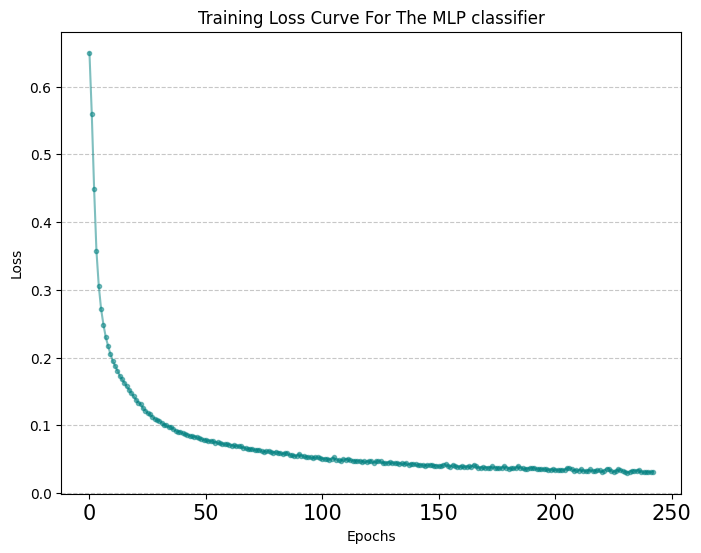

In [122]:
loss_history = mlp_clf4.loss_curve_

plt.figure(figsize=(8, 6))
plt.plot(loss_history, marker=".",  color="teal", alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve For The MLP classifier')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

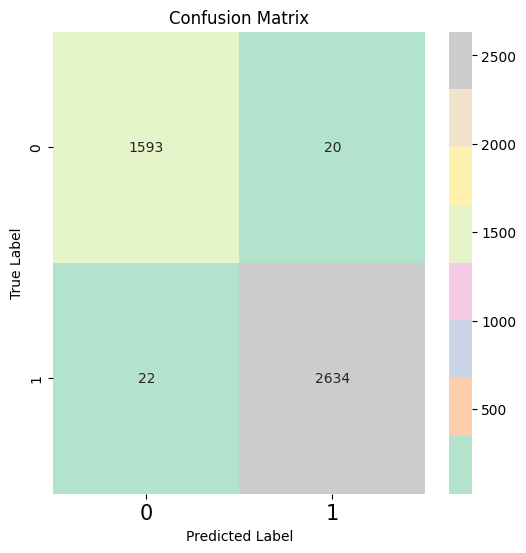

In [123]:
y_pred = mlp_clf4.predict(loans_prepared_df)

cm = confusion_matrix(labels_prepared, y_pred)

plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap="Pastel2")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

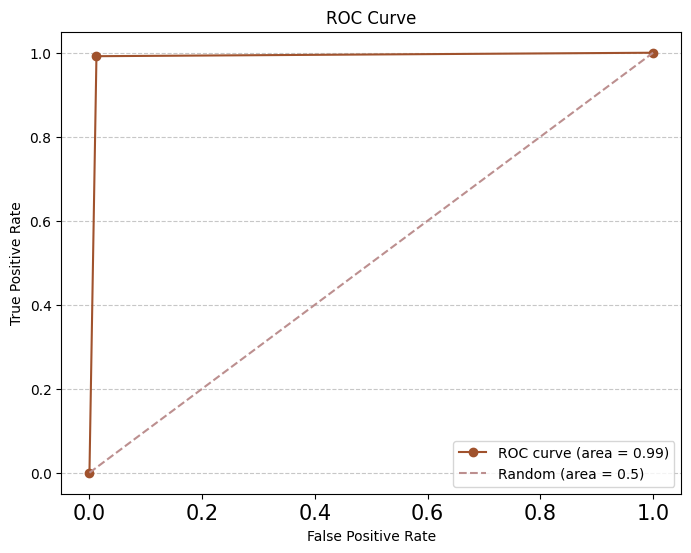

In [124]:
fpr, tpr, thresholds = roc_curve(labels_prepared, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', label='ROC curve (area = %0.2f)' % roc_auc, color="sienna")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random (area = 0.5)', color="rosybrown")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

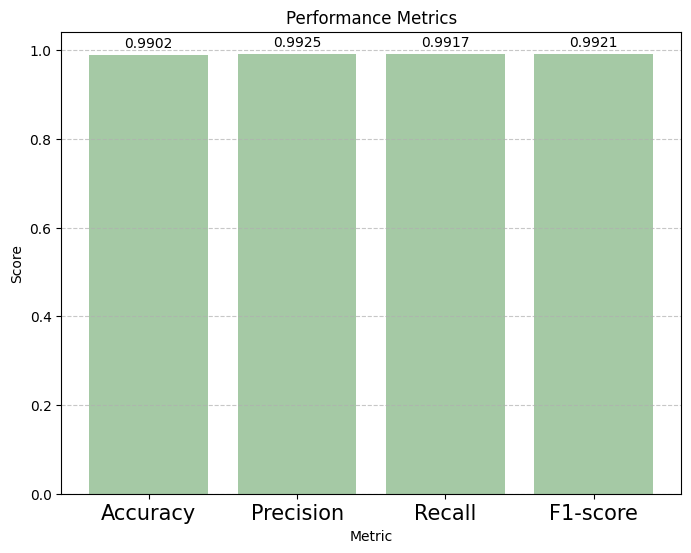

In [125]:
accuracy = accuracy_score(labels_prepared, y_pred)
precision = precision_score(labels_prepared, y_pred)
recall = recall_score(labels_prepared, y_pred)
f1 = f1_score(labels_prepared, y_pred)

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color='darkseagreen', alpha=0.8)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(metric_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom') 
plt.show()

*Plotting the accuracy for different layers*

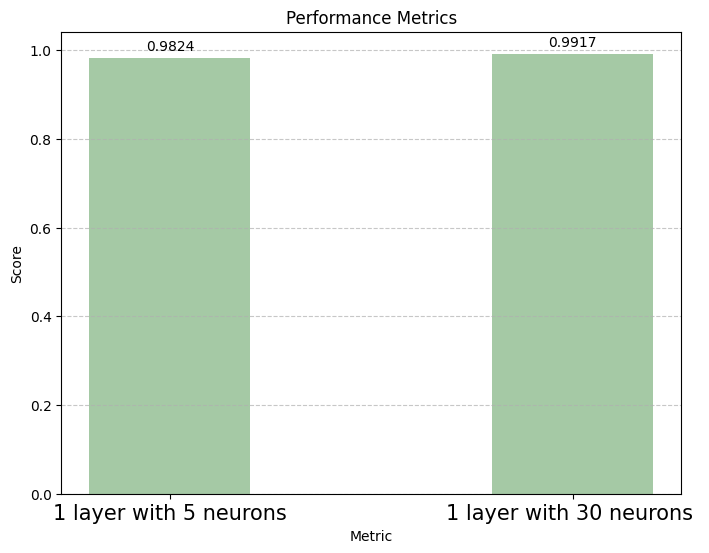

In [126]:
mlp_clf_pred1 = mlp_clf1.predict(loans_prepared_df)
mlp_clf_pred2 = mlp_clf2.predict(loans_prepared_df)
metric_names = ['1 layer with 5 neurons', '1 layer with 30 neurons ']


mlp_clf1_accuracy = accuracy_score(labels_prepared,mlp_clf_pred1) 

mlp_clf2_accuracy= precision_score(labels_prepared, mlp_clf_pred2)

metric_scores = [mlp_clf1_accuracy, mlp_clf2_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color='darkseagreen', alpha=0.8,width=0.4)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(metric_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom') 
plt.show()



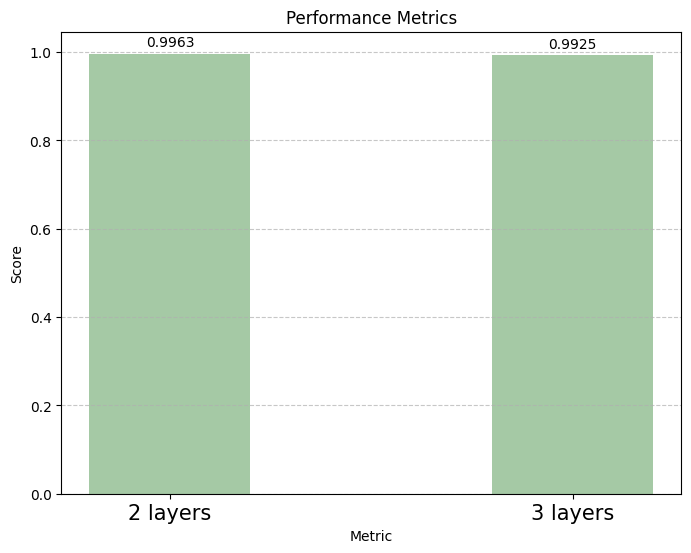

In [127]:
mlp_clf_pred3 = mlp_clf3.predict(loans_prepared_df)
mlp_clf_pred4 = mlp_clf4.predict(loans_prepared_df)
metric_names = ['2 layers', '3 layers']


mlp_clf3_accuracy = accuracy_score(labels_prepared,mlp_clf_pred3) 

mlp_clf4_accuracy= precision_score(labels_prepared, mlp_clf_pred4)

metric_scores = [mlp_clf3_accuracy, mlp_clf4_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color='darkseagreen', alpha=0.8,width=0.4)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(metric_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom') 
plt.show()


*Conclusion: 2 layers with 5 neurons and 20 neurons showed the best accuracy score* 

# Keras Tuner

In [128]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [129]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
)

In [130]:
tuner.search(loans_prepared_df, labels_prepared, epochs=100 ,validation_split=0.2 ,
             callbacks=[early_stopping_cb,ModelCheckpoint("my_checkpoints/best_model.keras",save_best_only=True)])

Trial 3 Complete [00h 00m 33s]
val_accuracy: 0.9291568994522095

Best val_accuracy So Far: 0.977751761674881
Total elapsed time: 00h 02m 00s


In [131]:
best_model = tuner.get_best_models()[0]
best_model

C:\Users\tasne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

In [132]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 87)                  │           1,566 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             880 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,446 (9.55 KB)

 Trainable params: 2,446 (9.55 KB)

 Non-trainable params: 0 (0.00 B)

*Finding the best model's evaluation results*

In [133]:
best_model.evaluate(loans_prepared_df, labels_prepared)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.9909 - loss: 0.0381


[0.04210824519395828, 0.9896931648254395]

In [134]:
y_pred_final = best_model.predict(loans_prepared_df)
y_pred_final_classes = (y_pred_final > 0.5).astype(int)
y_pred_final_classes

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step


array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step


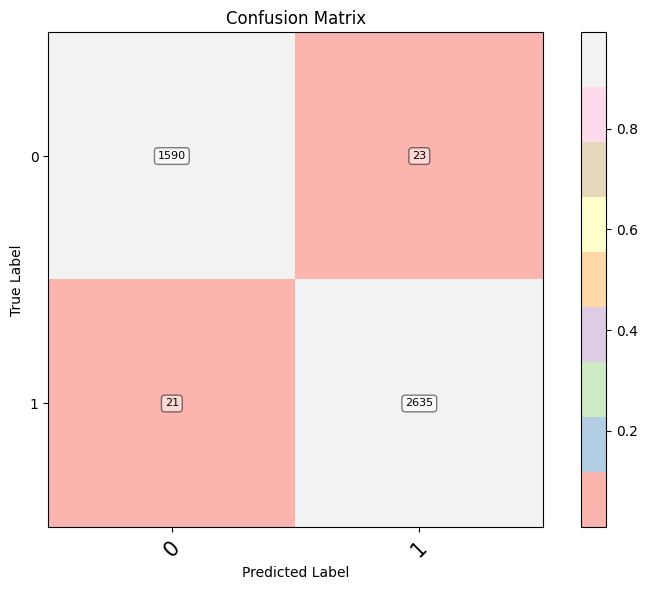

In [135]:
predictions = np.argmax(best_model.predict(loans_prepared_df), axis=-1)

cm = confusion_matrix(labels_prepared, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(cm_normalized, cmap='Pastel1')
plt.colorbar()
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

class_names = [str(i) for i in range(2)]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=8,
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)
plt.tight_layout()
plt.show()

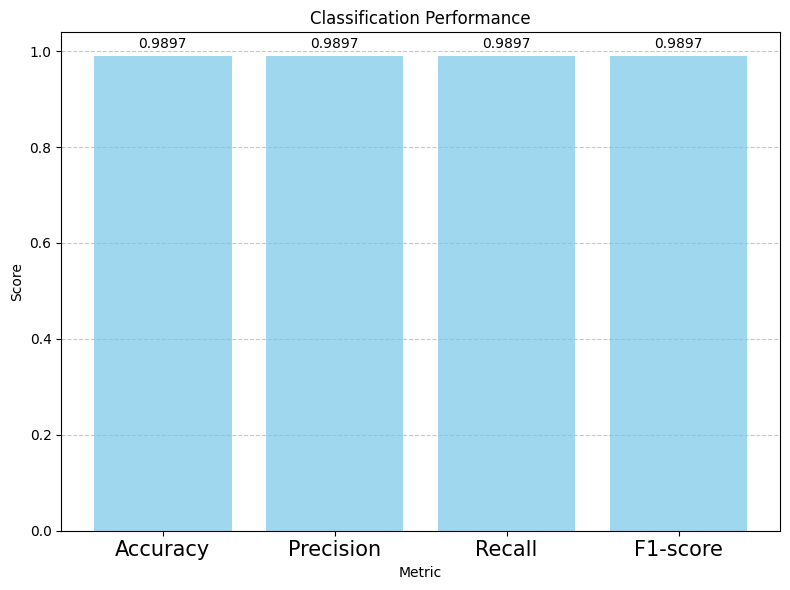

In [136]:
accuracy = accuracy_score(labels_prepared, predictions)
precision = precision_score(labels_prepared, predictions, average='weighted')
recall = recall_score(labels_prepared, predictions, average='weighted')
f1 = f1_score(labels_prepared, predictions, average='weighted')

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metric_scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_scores, color='skyblue', alpha=0.8)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Classification Performance')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(metric_scores):
  plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()